# Problemas de Regresión

### Carlos Adrián Palmieri Álvarez - A01635776

## Life Expectancy

In [1]:
import pandas as pd

In [2]:
# Cargando los datos
df = pd.read_csv('../data/raw/life_expectancy_data.csv')
df


Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# Borrando las columnas que no se van a utilizar en el análisis
df.drop(columns=['Status','Year','Country','percentage expenditure', 'under-five deaths ', ' HIV/AIDS', ' thinness 5-9 years'], axis=1, inplace=True)
df

Life expectancy   Adult Mortality  infant deaths  Alcohol  Hepatitis B  \
0                 65.0            263.0             62     0.01         65.0   
1                 59.9            271.0             64     0.01         62.0   
2                 59.9            268.0             66     0.01         64.0   
3                 59.5            272.0             69     0.01         67.0   
4                 59.2            275.0             71     0.01         68.0   
...                ...              ...            ...      ...          ...   
2933              44.3            723.0             27     4.36         68.0   
2934              44.5            715.0             26     4.06          7.0   
2935              44.8             73.0             25     4.43         73.0   
2936              45.3            686.0             25     1.72         76.0   
2937              46.0            665.0             24     1.68         79.0   

      Measles    BMI   Polio  Total expenditure  Diphtheria          GDP  \
0         1154   19.1    6.0               8.16         65.0  584.259210   
1          492   18.6   58.0               8.18         62.0  612.696514   
2          430   18.1   62.0               8.13         64.0  631.744976   
3         2787   17.6   67.0               8.52         67.0  669.959000   
4         3013   17.2   68.0               7.87         68.0   63.537231   
...        ...    ...    ...                ...          ...         ...   
2933        31   27.1   67.0               7.13         65.0  454.366654   
2934       998   26.7    7.0               6.52         68.0  453.351155   
2935       304   26.3   73.0               6.53         71.0   57.348340   
2936       529   25.9   76.0               6.16         75.0  548.587312   
2937      1483   25.5   78.0               7.10         78.0  547.358878   

      Population   thinness  1-19 years  Income composition of resources  \
0     33736494.0                   17.2                            0.479   
1       327582.0                   17.5                            0.476   
2     31731688.0                   17.7                            0.470   
3      3696958.0                   17.9                            0.463   
4      2978599.0                   18.2                            0.454   
...          ...                    ...                              ...   
2933  12777511.0                    9.4                            0.407   
2934  12633897.0                    9.8                            0.418   
2935    125525.0                    1.2                            0.427   
2936  12366165.0                    1.6                            0.427   
2937  12222251.0                   11.0                            0.434   

      Schooling  
0          10.1  
1          10.0  
2           9.9  
3           9.8  
4           9.5  
...         ...  
2933        9.2  
2934        9.5  
2935       10.0  
2936        9.8  
2937        9.8  

[2938 rows x 15 columns]

In [6]:
df.describe()

Life expectancy   Adult Mortality  infant deaths      Alcohol  \
count       2928.000000      2928.000000    2938.000000  2744.000000   
mean          69.224932       164.796448      30.303948     4.602861   
std            9.523867       124.292079     117.926501     4.052413   
min           36.300000         1.000000       0.000000     0.010000   
25%           63.100000        74.000000       0.000000     0.877500   
50%           72.100000       144.000000       3.000000     3.755000   
75%           75.700000       228.000000      22.000000     7.702500   
max           89.000000       723.000000    1800.000000    17.870000   

       Hepatitis B       Measles          BMI         Polio  \
count  2385.000000    2938.000000  2904.000000  2919.000000   
mean     80.940461    2419.592240    38.321247    82.550188   
std      25.070016   11467.272489    20.044034    23.428046   
min       1.000000       0.000000     1.000000     3.000000   
25%      77.000000       0.000000    19.300000    78.000000   
50%      92.000000      17.000000    43.500000    93.000000   
75%      97.000000     360.250000    56.200000    97.000000   
max      99.000000  212183.000000    87.300000    99.000000   

       Total expenditure  Diphtheria             GDP    Population  \
count         2712.00000  2919.000000    2490.000000  2.286000e+03   
mean             5.93819    82.324084    7483.158469  1.275338e+07   
std              2.49832    23.716912   14270.169342  6.101210e+07   
min              0.37000     2.000000       1.681350  3.400000e+01   
25%              4.26000    78.000000     463.935626  1.957932e+05   
50%              5.75500    93.000000    1766.947595  1.386542e+06   
75%              7.49250    97.000000    5910.806335  7.420359e+06   
max             17.60000    99.000000  119172.741800  1.293859e+09   

        thinness  1-19 years  Income composition of resources    Schooling  
count            2904.000000                      2771.000000  2775.000000  
mean                4.839704                         0.627551    11.992793  
std                 4.420195                         0.210904     3.358920  
min                 0.100000                         0.000000     0.000000  
25%                 1.600000                         0.493000    10.100000  
50%                 3.300000                         0.677000    12.300000  
75%                 7.200000                         0.779000    14.300000  
max                27.700000                         0.948000    20.700000

In [7]:
df.shape

(2938, 15)

In [8]:
# Revisando los valores nulos
df.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
Hepatitis B                        553
Measles                              0
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
# Analizando los valores faltantes 
df[df.isnull().any(axis=1)]


Life expectancy   Adult Mortality  infant deaths  Alcohol  Hepatitis B  \
32                75.6             19.0             21      NaN         95.0   
44                71.7            146.0             20     0.34          NaN   
45                71.6            145.0             20     0.36          NaN   
46                71.4            145.0             20     0.23          NaN   
47                71.3            145.0             21     0.25          NaN   
...                ...              ...            ...      ...          ...   
2918              46.4             64.0             39     2.33          NaN   
2919              45.5             69.0             41     2.44          NaN   
2920              44.6            611.0             43     2.61          NaN   
2921              43.8            614.0             44     2.62          NaN   
2922              67.0            336.0             22      NaN         87.0   

      Measles    BMI   Polio  Total expenditure  Diphtheria           GDP  \
32          63   59.5   95.0                NaN         95.0  4132.762920   
44       15374   47.0   87.0               3.60         87.0   294.335560   
45        5862   46.1   86.0               3.73         86.0  1774.336730   
46        2686   45.3   89.0               3.84         89.0  1732.857979   
47           0   44.4   86.0               3.49         86.0  1757.177970   
...        ...    ...    ...                ...          ...          ...   
2918       881   17.6   85.0               8.18         83.0   429.158343   
2919     25036   17.3   85.0               6.93         84.0   377.135244   
2920     16997   17.1   86.0               6.56         85.0   378.273624   
2921     30930   16.8   85.0               7.16         85.0   341.955625   
2922         0   31.8   88.0                NaN         87.0   118.693830   

      Population   thinness  1-19 years  Income composition of resources  \
32    39871528.0                    6.0                            0.743   
44     3243514.0                    6.3                            0.663   
45     3199546.0                    6.3                            0.653   
46    31592153.0                    6.4                            0.644   
47     3118366.0                    6.5                            0.636   
...          ...                    ...                              ...   
2918  11421984.0                    7.3                            0.443   
2919    111249.0                    7.4                            0.433   
2920   1824125.0                    7.4                            0.424   
2921   1531221.0                    7.5                            0.418   
2922  15777451.0                    5.6                            0.507   

      Schooling  
32         14.4  
44         11.5  
45         11.1  
46         10.9  
47         10.7  
...         ...  
2918       10.2  
2919       10.0  
2920        9.8  
2921        9.6  
2922       10.3  

[1289 rows x 15 columns]

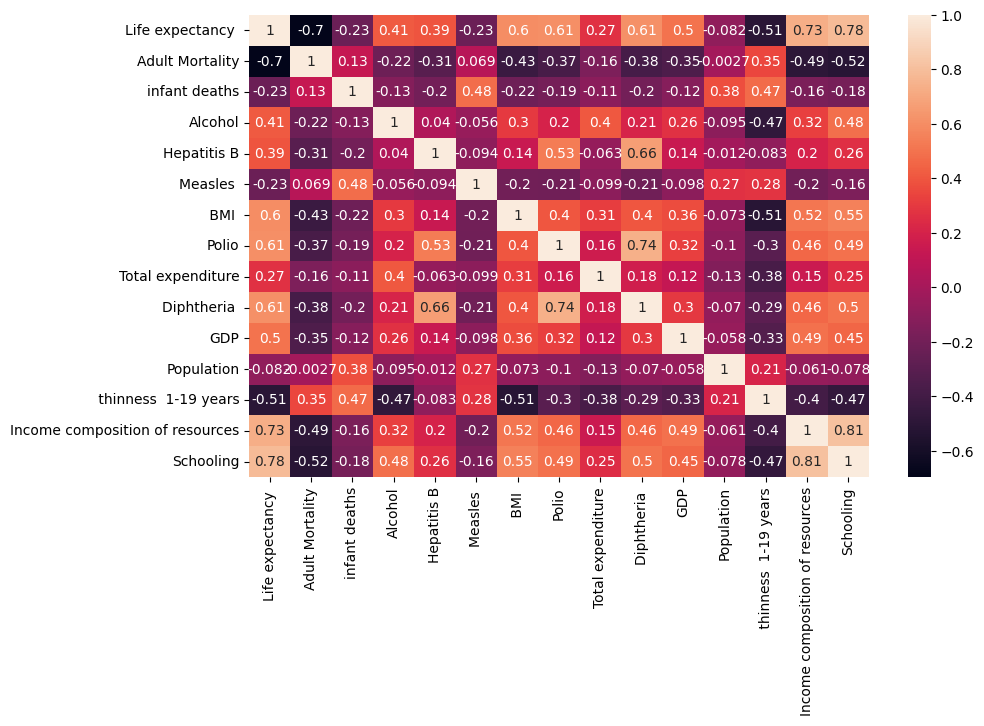

In [10]:
# Identificando qué tipo de valores faltantes existen, si son MCAR, MAR o MNAR
# Prueba de correlaciones en aquellos valores vacíos

# Guardando los registro con valores faltantes
missing_values = df[df.isnull().any(axis=1)]
missing_values

# Revisando la correlación de los valores faltantes
missing_values.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.corr(), annot=True)
plt.show()


### 1.Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

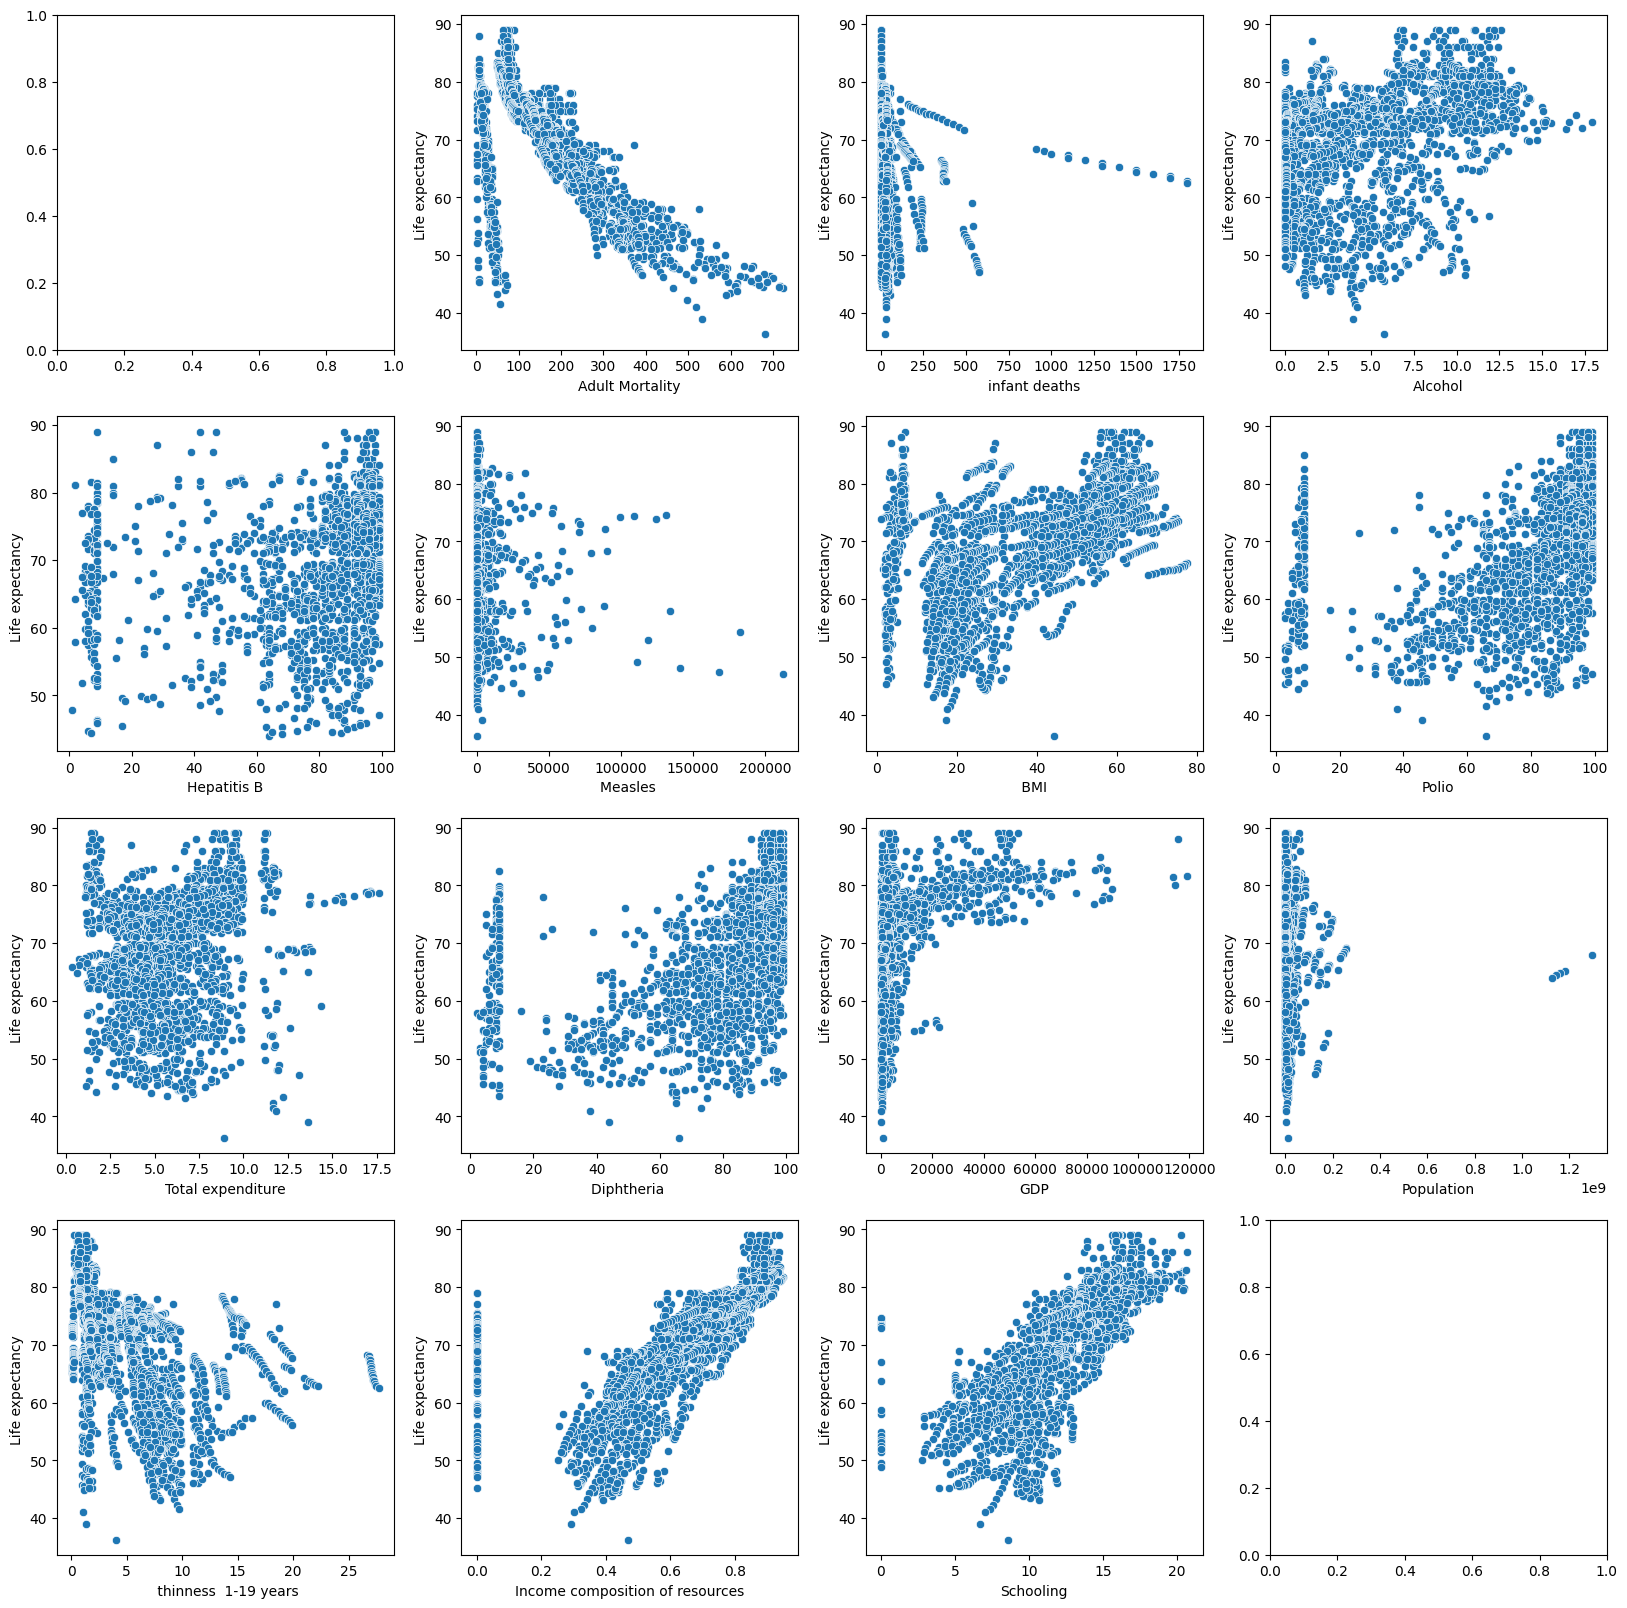

In [12]:
# Graficando cada variable vs la columna "Life expectancy "
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficas acomodadas en 4x4 sin la gráfica Light expectancy vs Light expectancy
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, column in enumerate(df.columns):
    if column != 'Life expectancy ':
        sns.scatterplot(data=df, x=column, y='Life expectancy ', ax=axs[i // 4, i % 4])


### 2.Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [13]:
import numpy as np
import numpy.linalg as ln

In [14]:
# Implementando la fórmula directa de Regresión lineal múltiple
df_clean = df.dropna()
X = df_clean.drop(columns='Life expectancy ')
y = df_clean['Life expectancy ']

X_np = X.to_numpy()
y_np = y.to_numpy()

X_np.shape, y_np.shape


((1649, 14), (1649,))

In [15]:
# Revisar si las matrices tienen valores vacios
np.isnan(X_np).sum(), np.isnan(y_np).sum()


(np.int64(0), np.int64(0))

In [16]:
print(X_np)

[[2.63e+02 6.20e+01 1.00e-02 ... 1.72e+01 4.79e-01 1.01e+01]
 [2.71e+02 6.40e+01 1.00e-02 ... 1.75e+01 4.76e-01 1.00e+01]
 [2.68e+02 6.60e+01 1.00e-02 ... 1.77e+01 4.70e-01 9.90e+00]
 ...
 [7.30e+01 2.50e+01 4.43e+00 ... 1.20e+00 4.27e-01 1.00e+01]
 [6.86e+02 2.50e+01 1.72e+00 ... 1.60e+00 4.27e-01 9.80e+00]
 [6.65e+02 2.40e+01 1.68e+00 ... 1.10e+01 4.34e-01 9.80e+00]]


In [17]:
# Eror de Gradiente 
def grad(X, y, beta):
    n = len(y)
    y_pred = X @ beta
    res = y - y_pred
    tmp = res[:,np.newaxis] * X # Esto sirve para operar elemento a elemento
    return -2/n * tmp.sum(axis=0)

In [19]:
# Generando funcion de regresion lineal multiple
from sklearn.preprocessing import StandardScaler
def fit_model(X,y, alpha = .005,maxit = 10000):
    
    # Normalización de los datos
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    scaler_y = StandardScaler()
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # de predictores
    n = X.shape[1]
    #print(f"Numero de predictores: {n}")

    #Inicializando beta
    beta = 2*np.random.rand(n) - 1.0
    #print(f"Beta inicial: {beta}")

    #Optimizando el algoritmo
    it = 0
    while (np.linalg.norm(grad(X_scaled, y_scaled, beta)) > 1e-4) and (it < maxit):
        beta = beta - alpha * grad(X_scaled, y_scaled, beta)
        
        # Chequeo para valores extremos de beta
        if np.any(np.abs(beta) > 1e10):  # Si algún valor en beta es extremadamente grande
            print(f"Warning: Valores de Beta empieza a hacerse grandes en iteración {it}")
            break

        # Chequeo de NaN en beta
        if np.any(np.isnan(beta)):
            print(f"NaN se detectó en la iteración {it}")
            break

        it = it + 1
        #print(it)
    return beta, scaler_X, scaler_y

In [20]:
# Modelo de regresion lineal multiple

beta = fit_model(X_np, y_np)
print("Los coeficientes son: ", beta)


Los coeficientes son:  (array([-0.41557125, -0.02833773, -0.07918307, -0.00251173,  0.00986548,
        0.08712028,  0.02295472, -0.00678517,  0.05081052,  0.08809878,
        0.0220853 , -0.04523112,  0.23104851,  0.28071011]), StandardScaler(), StandardScaler())


### 3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE. 

In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import LeaveOneOut

In [25]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suprimir los warnings de tipo UndefinedMetricWarning
warnings.simplefilter(action='ignore', category=UndefinedMetricWarning)

In [26]:
# Funcion para predecir
def predict(X, beta, scaler_X, scaler_y):
    X_scaled = scaler_X.transform(X)  # Normalizar las nuevas entradas
    y_pred_scaled = X_scaled @ beta
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()  # Desnormalizar
    return y_pred

In [27]:
# Evaluando con validación cruzada
def validacion_cruzada(X, y, k):
    kf = KFold(n_splits=k, shuffle=True)

    mse_cv = []
    mae_cv = []
    r2_cv = []
    for train_index, test_index in kf.split(X):

        # Fase de entrenamiento
        X_train, y_train = X[train_index, :], y[train_index]
        beta_cv, scaler_X, scaler_y = fit_model(X_train, y_train)

        # Fase de prueba
        X_test, y_test = X[test_index, :], y[test_index]
        y_pred = predict(X_test, beta_cv, scaler_X, scaler_y)

        # Calcular MSE, MAE y R^2
        mse_i = mean_squared_error(y_test, y_pred)
        print('MSE = ', mse_i)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        print('MAE = ', mae_i)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        print('R^2 = ', r2_i)
        r2_cv.append(r2_i)

    print('MSE Promedio:', np.average(mse_cv), '  MAE Promedio:', np.average(mae_cv), '  R^2 Promedio:', np.average(r2_cv))


In [28]:
# Revisando si X_np y y_np tienen valores nulos
#np.isnan(X_np).sum(), np.isnan(y_np).sum()

validacion_cruzada(X_np, y_np, 5)


MSE =  20.361671522748033
MAE =  3.246274965738945
R^2 =  0.7528717589438239
MSE =  22.221650655769384
MAE =  3.2581433266346025
R^2 =  0.7270027093880594
MSE =  15.58103223835667
MAE =  3.003647878204671
R^2 =  0.7221703681355872
MSE =  17.27218951181445
MAE =  2.979266206194986
R^2 =  0.7693544342873956
MSE =  18.51895080880482
MAE =  3.1379932391455836
R^2 =  0.7949390405075046
MSE Promedio: 18.79109894749867   MAE Promedio: 3.125065123183757   R^2 Promedio: 0.7532676622524741


### 4. Utiliza validación cruzada de Monte Carlo con 1000 iteraciones para encontrar histogramas de R2, MSE y MAE.

In [29]:
def monte_carlo_cross_validation(X, y, n_iterations, test_size=0.2):

    mse_cv = []
    mae_cv = []
    r2_cv = []

    for _ in range(n_iterations):
        # Dividir los datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        
        # Ajustar el modelo en el conjunto de entrenamiento
        beta, scaler_X, scaler_y = fit_model(X_train, y_train)
        
        # Hacer predicciones en el conjunto de prueba
        y_pred = predict(X_test, beta, scaler_X, scaler_y)
        
         # Calcular MSE, MAE y R^2
        mse_i = mean_squared_error(y_test, y_pred)
        #print('MSE = ', mse_i)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        #print('MAE = ', mae_i)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        #print('R^2 = ', r2_i)
        r2_cv.append(r2_i)

        # Porcentaje de completado del proceso pero eliminando la impresión de cada iteración
        print(f'Iteración {_ + 1}/{n_iterations}', end='\r')

    print('MSE Promedio:', np.average(mse_cv), '  MAE Promedio:', np.average(mae_cv), '  R^2 Promedio:', np.average(r2_cv))
    return np.average(mse_cv), np.average(mae_cv), np.average(r2_cv), mse_cv, mae_cv, r2_cv

In [30]:
# Evaluando con método Monte Carlo
msve_avg, mae_avg, r2_avg, msve, mae, r2 = monte_carlo_cross_validation(X_np, y_np, n_iterations=1000)
print(msve_avg, mae_avg, r2_avg)

MSE Promedio: 18.734391304381823   MAE Promedio: 3.118279494404135   R^2 Promedio: 0.7564712964804281
18.734391304381823 3.118279494404135 0.7564712964804281


In [31]:
MC_mse = msve
MC_mae = mae
MC_r2 = r2

MC_mse_avg = msve_avg
MC_mae_avg = mae_avg
MC_r2_avg = r2_avg


print(f'MSE: {MC_mse_avg}, MAE: {MC_mae_avg}, R^2: {MC_r2_avg}')

MSE: 18.734391304381823, MAE: 3.118279494404135, R^2: 0.7564712964804281


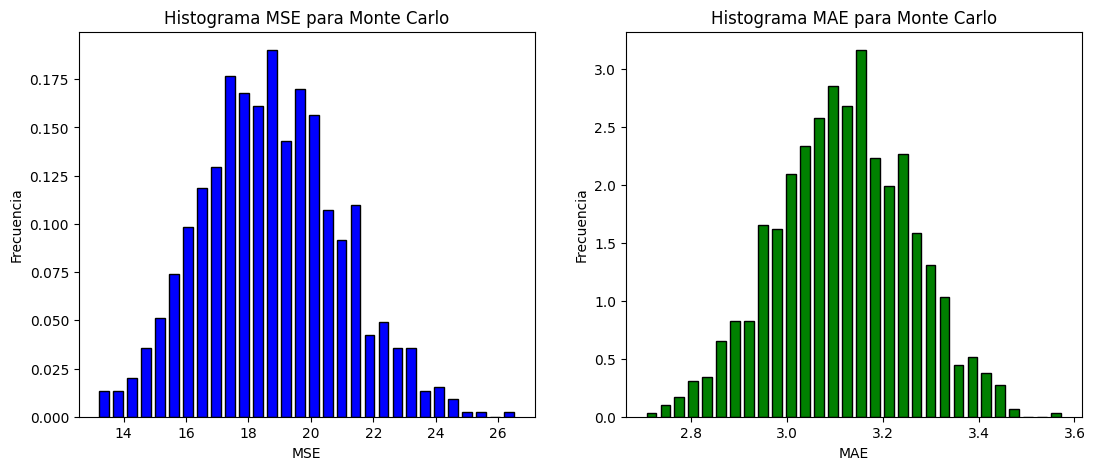

In [32]:
# Generando histograma de MSE y MAE
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(MC_mse, bins=30, color='blue', edgecolor='black', rwidth=0.70, density=True)
plt.title('Histograma MSE para Monte Carlo')
plt.xlabel('MSE')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(MC_mae, bins=30, color='green', edgecolor='black', rwidth=0.70, density=True)
plt.title('Histograma MAE para Monte Carlo')
plt.xlabel('MAE')
plt.ylabel('Frecuencia')

plt.show()

### 5. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de MSE y MAE. ¿Los histogramas son distintos a los obtenidos con el método de Monte Carlo?

#### Método de validación Leave-P-Out(LpOCV) para P = 2

In [1731]:
def leave_p_out_cross_validation(X, y, p):

    # Calculando las particiones necesarias
    lpo = LeavePOut(p)

    mse_cv = []
    mae_cv = []
    r2_cv = []
    
    i = 0
    it = lpo.get_n_splits(X)
    print(f'Número de particiones: {it}')
    for train_index, test_index in lpo.split(X):

        # Fase de entrenamiento
        X_train, y_train = X[train_index, :], y[train_index]
        beta_cv, scaler_X, scaler_y = fit_model(X_train, y_train)

        # Fase de prueba
        X_test, y_test = X[test_index, :], y[test_index]
        y_pred = predict(X_test, beta_cv, scaler_X, scaler_y)

        # Calcular MSE, MAE y R^2
        mse_i = mean_squared_error(y_test, y_pred)
        #print('MSE = ', mse_i)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        #print('MAE = ', mae_i)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        #print('R^2 = ', r2_i)
        r2_cv.append(r2_i)

        i += 1
        # Calculando el procentaje de avance
        percent = i * 100 / it
        print(f'Porcentaje de avance: ({percent}%)', end='\r')



    print('MSE Promedio:', np.average(mse_cv), '  MAE Promedio:', np.average(mae_cv), '  R^2 Promedio:', np.average(r2_cv))


Tiempo de ejecución: 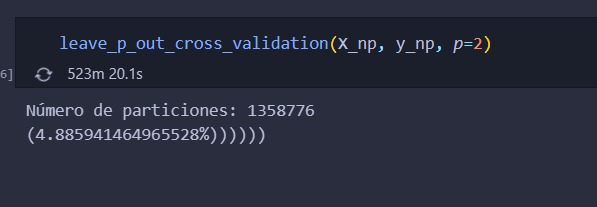

In [1686]:
leave_p_out_cross_validation(X_np, y_np, p=2)

Número de particiones: 1358776


KeyboardInterrupt: 

#### Método de validación Leave One Out (LOOCV)

In [33]:
# Generando método de validación cruzada con LOOCV debido al tiempo de tardía de LPoCV

def leave_one_out_cross_validation(X, y):
    # Calculando las particiones necesarias
    loo = LeaveOneOut()

    mse_cv = []
    mae_cv = []
    r2_cv = []
    
    i = 0
    it = loo.get_n_splits(X)
    print(f'Número de particiones: {it}')
    for train_index, test_index in loo.split(X):

        # Fase de entrenamiento
        X_train, y_train = X[train_index, :], y[train_index]
        beta_cv, scaler_X, scaler_y = fit_model(X_train, y_train)

        # Fase de prueba
        X_test, y_test = X[test_index, :], y[test_index]
        y_pred = predict(X_test, beta_cv, scaler_X, scaler_y)

        # Calcular MSE, MAE y R^2
        mse_i = mean_squared_error(y_test, y_pred)
        #print('MSE = ', mse_i)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        #print('MAE = ', mae_i)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        #print('R^2 = ', r2_i)
        r2_cv.append(r2_i)

        i += 1
        # Calculando el procentaje de avance
        percent = round (i * 100 / it, 2)
        print(f'Porcentaje de avance: ({percent}%)', end='\r')



    print('MSE Promedio:', np.average(mse_cv), '  MAE Promedio:', np.average(mae_cv), '  R^2 Promedio:', np.average(r2_cv))
    return np.average(mse_cv), np.average(mae_cv), np.average(r2_cv), mse_cv, mae_cv, r2_cv


In [34]:
LOOCV_msve_avg, LOOCV_mae_avg, LOOCV_r2_avg, LOOCV_msve, LOOCV_mae, LOOCV_r2 = leave_one_out_cross_validation(X_np, y_np)


Número de particiones: 1649
MSE Promedio: 18.61551424388183   MAE Promedio: 3.110112329306491   R^2 Promedio: nan


#### Histogramas

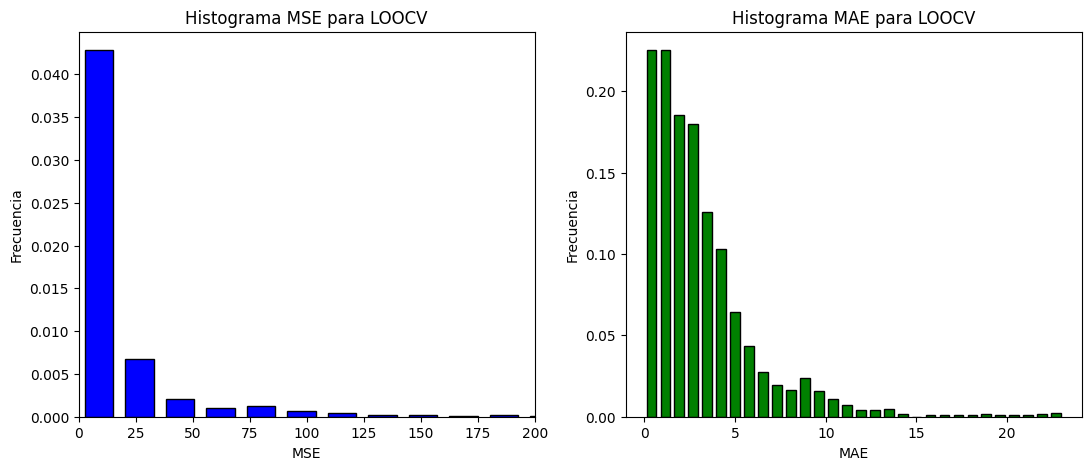

In [35]:
# Generando histograma de MSE y MAE
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(LOOCV_msve, bins=30, color='blue', edgecolor='black', rwidth=0.70, density=True)
plt.title('Histograma MSE para LOOCV')
plt.xlabel('MSE')
plt.ylabel('Frecuencia')
plt.xlim(0, 200)

# Reduciendo escalas para visualizar mejor el histograma

plt.subplot(1, 3, 2)
plt.hist(LOOCV_mae, bins=30, color='green', edgecolor='black', rwidth=0.70, density=True)
plt.title('Histograma MAE para LOOCV')
plt.xlabel('MAE')
plt.ylabel('Frecuencia')

plt.show()


El histograma para el método de validación Monte Carlo tiene una distribución más o menos simétrica para ámbos errores, ya sea para el MSE y para el MAE; para el MSE se centra en valores entre 17 y 20, lo que puede indicar que la mayoría de veces el error cuadrático medio se mantiene constante, de igual forma, el MAE se matiene simétrica y con un errores centrados en alrededor de 3 lo que puede significar que mantiene rendimientos consistentes con pequeñas variaciones.

Para LOOCV presenta un MSE concentrado al extremo izquierdo, alrededor de 0 a 25 en donde se concentra la mayoria de los errores, lo cual puede significar que en algunas iteraciones el error puede ser demasiado alto, puede ser debido a que tiene una alta variabilidad. En MAE presenta un histograma similar, los datos están cargados a la izquierda con valores pequeños dominando la distribución, sin embargo, en algunos casos se puede llegar a tener errores demasiado altos.

### 6. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, X112, X132), así como los productos entre pares de variables (por ejemplo, X1xX2, X3xX4). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [36]:
df_clean

Life expectancy   Adult Mortality  infant deaths  Alcohol  Hepatitis B  \
0                 65.0            263.0             62     0.01         65.0   
1                 59.9            271.0             64     0.01         62.0   
2                 59.9            268.0             66     0.01         64.0   
3                 59.5            272.0             69     0.01         67.0   
4                 59.2            275.0             71     0.01         68.0   
...                ...              ...            ...      ...          ...   
2933              44.3            723.0             27     4.36         68.0   
2934              44.5            715.0             26     4.06          7.0   
2935              44.8             73.0             25     4.43         73.0   
2936              45.3            686.0             25     1.72         76.0   
2937              46.0            665.0             24     1.68         79.0   

      Measles    BMI   Polio  Total expenditure  Diphtheria          GDP  \
0         1154   19.1    6.0               8.16         65.0  584.259210   
1          492   18.6   58.0               8.18         62.0  612.696514   
2          430   18.1   62.0               8.13         64.0  631.744976   
3         2787   17.6   67.0               8.52         67.0  669.959000   
4         3013   17.2   68.0               7.87         68.0   63.537231   
...        ...    ...    ...                ...          ...         ...   
2933        31   27.1   67.0               7.13         65.0  454.366654   
2934       998   26.7    7.0               6.52         68.0  453.351155   
2935       304   26.3   73.0               6.53         71.0   57.348340   
2936       529   25.9   76.0               6.16         75.0  548.587312   
2937      1483   25.5   78.0               7.10         78.0  547.358878   

      Population   thinness  1-19 years  Income composition of resources  \
0     33736494.0                   17.2                            0.479   
1       327582.0                   17.5                            0.476   
2     31731688.0                   17.7                            0.470   
3      3696958.0                   17.9                            0.463   
4      2978599.0                   18.2                            0.454   
...          ...                    ...                              ...   
2933  12777511.0                    9.4                            0.407   
2934  12633897.0                    9.8                            0.418   
2935    125525.0                    1.2                            0.427   
2936  12366165.0                    1.6                            0.427   
2937  12222251.0                   11.0                            0.434   

      Schooling  
0          10.1  
1          10.0  
2           9.9  
3           9.8  
4           9.5  
...         ...  
2933        9.2  
2934        9.5  
2935       10.0  
2936        9.8  
2937        9.8  

[1649 rows x 15 columns]

In [37]:
df_clean_2 = df_clean.copy()
df_clean_2 

Life expectancy   Adult Mortality  infant deaths  Alcohol  Hepatitis B  \
0                 65.0            263.0             62     0.01         65.0   
1                 59.9            271.0             64     0.01         62.0   
2                 59.9            268.0             66     0.01         64.0   
3                 59.5            272.0             69     0.01         67.0   
4                 59.2            275.0             71     0.01         68.0   
...                ...              ...            ...      ...          ...   
2933              44.3            723.0             27     4.36         68.0   
2934              44.5            715.0             26     4.06          7.0   
2935              44.8             73.0             25     4.43         73.0   
2936              45.3            686.0             25     1.72         76.0   
2937              46.0            665.0             24     1.68         79.0   

      Measles    BMI   Polio  Total expenditure  Diphtheria          GDP  \
0         1154   19.1    6.0               8.16         65.0  584.259210   
1          492   18.6   58.0               8.18         62.0  612.696514   
2          430   18.1   62.0               8.13         64.0  631.744976   
3         2787   17.6   67.0               8.52         67.0  669.959000   
4         3013   17.2   68.0               7.87         68.0   63.537231   
...        ...    ...    ...                ...          ...         ...   
2933        31   27.1   67.0               7.13         65.0  454.366654   
2934       998   26.7    7.0               6.52         68.0  453.351155   
2935       304   26.3   73.0               6.53         71.0   57.348340   
2936       529   25.9   76.0               6.16         75.0  548.587312   
2937      1483   25.5   78.0               7.10         78.0  547.358878   

      Population   thinness  1-19 years  Income composition of resources  \
0     33736494.0                   17.2                            0.479   
1       327582.0                   17.5                            0.476   
2     31731688.0                   17.7                            0.470   
3      3696958.0                   17.9                            0.463   
4      2978599.0                   18.2                            0.454   
...          ...                    ...                              ...   
2933  12777511.0                    9.4                            0.407   
2934  12633897.0                    9.8                            0.418   
2935    125525.0                    1.2                            0.427   
2936  12366165.0                    1.6                            0.427   
2937  12222251.0                   11.0                            0.434   

      Schooling  
0          10.1  
1          10.0  
2           9.9  
3           9.8  
4           9.5  
...         ...  
2933        9.2  
2934        9.5  
2935       10.0  
2936        9.8  
2937        9.8  

[1649 rows x 15 columns]

In [38]:
# Agregando el cuadrado de cada variable excepto "Life expectancy"
for column in df_clean_2.columns:
    if column != 'Life expectancy ':
        df_clean_2[f'{column}^2'] = df_clean_2[column] ** 2
df_clean_2

Life expectancy   Adult Mortality  infant deaths  Alcohol  Hepatitis B  \
0                 65.0            263.0             62     0.01         65.0   
1                 59.9            271.0             64     0.01         62.0   
2                 59.9            268.0             66     0.01         64.0   
3                 59.5            272.0             69     0.01         67.0   
4                 59.2            275.0             71     0.01         68.0   
...                ...              ...            ...      ...          ...   
2933              44.3            723.0             27     4.36         68.0   
2934              44.5            715.0             26     4.06          7.0   
2935              44.8             73.0             25     4.43         73.0   
2936              45.3            686.0             25     1.72         76.0   
2937              46.0            665.0             24     1.68         79.0   

      Measles    BMI   Polio  Total expenditure  Diphtheria   ...  Measles ^2  \
0         1154   19.1    6.0               8.16         65.0  ...     1331716   
1          492   18.6   58.0               8.18         62.0  ...      242064   
2          430   18.1   62.0               8.13         64.0  ...      184900   
3         2787   17.6   67.0               8.52         67.0  ...     7767369   
4         3013   17.2   68.0               7.87         68.0  ...     9078169   
...        ...    ...    ...                ...          ...  ...         ...   
2933        31   27.1   67.0               7.13         65.0  ...         961   
2934       998   26.7    7.0               6.52         68.0  ...      996004   
2935       304   26.3   73.0               6.53         71.0  ...       92416   
2936       529   25.9   76.0               6.16         75.0  ...      279841   
2937      1483   25.5   78.0               7.10         78.0  ...     2199289   

       BMI ^2  Polio^2  Total expenditure^2  Diphtheria ^2          GDP^2  \
0      364.81     36.0              66.5856         4225.0  341358.824470   
1      345.96   3364.0              66.9124         3844.0  375397.018268   
2      327.61   3844.0              66.0969         4096.0  399101.714701   
3      309.76   4489.0              72.5904         4489.0  448845.061681   
4      295.84   4624.0              61.9369         4624.0    4036.979723   
...       ...      ...                  ...            ...            ...   
2933   734.41   4489.0              50.8369         4225.0  206449.056267   
2934   712.89     49.0              42.5104         4624.0  205527.269921   
2935   691.69   5329.0              42.6409         5041.0    3288.832101   
2936   670.81   5776.0              37.9456         5625.0  300948.038887   
2937   650.25   6084.0              50.4100         6084.0  299601.741873   

      Population^2   thinness  1-19 years^2  \
0     1.138151e+15                   295.84   
1     1.073100e+11                   306.25   
2     1.006900e+15                   313.29   
3     1.366750e+13                   320.41   
4     8.872052e+12                   331.24   
...            ...                      ...   
2933  1.632648e+14                    88.36   
2934  1.596154e+14                    96.04   
2935  1.575653e+10                     1.44   
2936  1.529220e+14                     2.56   
2937  1.493834e+14                   121.00   

      Income composition of resources^2  Schooling^2  
0                              0.229441       102.01  
1                              0.226576       100.00  
2                              0.220900        98.01  
3                              0.214369        96.04  
4                              0.206116        90.25  
...                                 ...          ...  
2933                           0.165649        84.64  
2934                           0.174724        90.25  
2935                           0.182329       100.00  
2936                           0

In [39]:
# Agregando el producto de cada par de variables excepto "Life expectancy", X1*X2 X3*X4, etc.
life_expectancy = df_clean_2["Life expectancy "]

# Filtrar las columnas que no sean cuadradas
non_squared_columns = [col for col in df_clean_2.columns if not col.endswith('^2')]
df_filtered = df_clean_2[non_squared_columns]
df_filtered.drop(columns='Life expectancy ', inplace=True)
#print(df_filtered)

products_df = pd.DataFrame()

for i in range(0, len(df_filtered.columns) - 1, 2):
    col1 = df_filtered.columns[i]
    col2 = df_filtered.columns[i + 1]
    
    products_df[f'{col1}*{col2}'] = df_filtered[col1] * df_filtered[col2]

# Recuperar las columnas cuadradas para agregarlas después
squared_columns = [col for col in df_clean_2.columns if col.endswith('^2')]
squared_df = df_clean_2[squared_columns]

final_df = pd.concat([df_clean_2, squared_df, products_df], axis=1)

final_df

C:\Users\palmi\AppData\Local\Temp\ipykernel_50008\643249155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns='Life expectancy ', inplace=True)


Life expectancy   Adult Mortality  infant deaths  Alcohol  Hepatitis B  \
0                 65.0            263.0             62     0.01         65.0   
1                 59.9            271.0             64     0.01         62.0   
2                 59.9            268.0             66     0.01         64.0   
3                 59.5            272.0             69     0.01         67.0   
4                 59.2            275.0             71     0.01         68.0   
...                ...              ...            ...      ...          ...   
2933              44.3            723.0             27     4.36         68.0   
2934              44.5            715.0             26     4.06          7.0   
2935              44.8             73.0             25     4.43         73.0   
2936              45.3            686.0             25     1.72         76.0   
2937              46.0            665.0             24     1.68         79.0   

      Measles    BMI   Polio  Total expenditure  Diphtheria   ...  \
0         1154   19.1    6.0               8.16         65.0  ...   
1          492   18.6   58.0               8.18         62.0  ...   
2          430   18.1   62.0               8.13         64.0  ...   
3         2787   17.6   67.0               8.52         67.0  ...   
4         3013   17.2   68.0               7.87         68.0  ...   
...        ...    ...    ...                ...          ...  ...   
2933        31   27.1   67.0               7.13         65.0  ...   
2934       998   26.7    7.0               6.52         68.0  ...   
2935       304   26.3   73.0               6.53         71.0  ...   
2936       529   25.9   76.0               6.16         75.0  ...   
2937      1483   25.5   78.0               7.10         78.0  ...   

       thinness  1-19 years^2  Income composition of resources^2  Schooling^2  \
0                      295.84                           0.229441       102.01   
1                      306.25                           0.226576       100.00   
2                      313.29                           0.220900        98.01   
3                      320.41                           0.214369        96.04   
4                      331.24                           0.206116        90.25   
...                       ...                                ...          ...   
2933                    88.36                           0.165649        84.64   
2934                    96.04                           0.174724        90.25   
2935                     1.44                           0.182329       100.00   
2936                     2.56                           0.182329        96.04   
2937                   121.00                           0.188356        96.04   

      Adult Mortality*infant deaths  Alcohol*Hepatitis B  Measles * BMI   \
0                           16306.0                 0.65         22041.4   
1                           17344.0                 0.62          9151.2   
2                           17688.0                 0.64          7783.0   
3                           18768.0                 0.67         49051.2   
4                           19525.0                 0.68         51823.6   
...                             ...                  ...             ...   
2933                        19521.0               296.48           840.1   
2934                        18590.0                28.42         26646.6   
2935                         1825.0               323.39          7995.2   
2936                        17150.0               130.72         13701.1   
2937                        15960.0               132.72         37816.5   

      Polio*Total expenditure  Diphtheria *GDP  \
0                       48.96     37976.848650   
1                      474.44     37987.183868   
2                      504.06     40431.678464   
3                      570.84     44887.253000   
4                      535.16      4320.531708   
...                       ... 

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Life expectancy                            1649 non-null   float64
 1   Adult Mortality                            1649 non-null   float64
 2   infant deaths                              1649 non-null   int64  
 3   Alcohol                                    1649 non-null   float64
 4   Hepatitis B                                1649 non-null   float64
 5   Measles                                    1649 non-null   int64  
 6    BMI                                       1649 non-null   float64
 7   Polio                                      1649 non-null   float64
 8   Total expenditure                          1649 non-null   float64
 9   Diphtheria                                 1649 non-null   float64
 10  GDP                          

In [41]:
#print(final_df.columns[29])
#print(final_df.columns[0])
final_df.iloc[:, 15:43].head(5)
#final_df.head(5)

Adult Mortality^2  infant deaths^2  Alcohol^2  Hepatitis B^2  Measles ^2  \
0            69169.0             3844     0.0001         4225.0     1331716   
1            73441.0             4096     0.0001         3844.0      242064   
2            71824.0             4356     0.0001         4096.0      184900   
3            73984.0             4761     0.0001         4489.0     7767369   
4            75625.0             5041     0.0001         4624.0     9078169   

    BMI ^2  Polio^2  Total expenditure^2  Diphtheria ^2          GDP^2  ...  \
0   364.81     36.0              66.5856         4225.0  341358.824470  ...   
1   345.96   3364.0              66.9124         3844.0  375397.018268  ...   
2   327.61   3844.0              66.0969         4096.0  399101.714701  ...   
3   309.76   4489.0              72.5904         4489.0  448845.061681  ...   
4   295.84   4624.0              61.9369         4624.0    4036.979723  ...   

   Measles ^2   BMI ^2  Polio^2  Total expenditure^2  Diphtheria ^2  \
0     1331716   364.81     36.0              66.5856         4225.0   
1      242064   345.96   3364.0              66.9124         3844.0   
2      184900   327.61   3844.0              66.0969         4096.0   
3     7767369   309.76   4489.0              72.5904         4489.0   
4     9078169   295.84   4624.0              61.9369         4624.0   

           GDP^2  Population^2   thinness  1-19 years^2  \
0  341358.824470  1.138151e+15                   295.84   
1  375397.018268  1.073100e+11                   306.25   
2  399101.714701  1.006900e+15                   313.29   
3  448845.061681  1.366750e+13                   320.41   
4    4036.979723  8.872052e+12                   331.24   

   Income composition of resources^2  Schooling^2  
0                           0.229441       102.01  
1                           0.226576       100.00  
2                           0.220900        98.01  
3                           0.214369        96.04  
4                           0.206116        90.25  

[5 rows x 28 columns]

In [42]:
print(final_df.columns)
print(final_df.shape)

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'Hepatitis B', 'Measles ', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling', 'Adult Mortality^2',
       'infant deaths^2', 'Alcohol^2', 'Hepatitis B^2', 'Measles ^2',
       ' BMI ^2', 'Polio^2', 'Total expenditure^2', 'Diphtheria ^2', 'GDP^2',
       'Population^2', ' thinness  1-19 years^2',
       'Income composition of resources^2', 'Schooling^2', 'Adult Mortality^2',
       'infant deaths^2', 'Alcohol^2', 'Hepatitis B^2', 'Measles ^2',
       ' BMI ^2', 'Polio^2', 'Total expenditure^2', 'Diphtheria ^2', 'GDP^2',
       'Population^2', ' thinness  1-19 years^2',
       'Income composition of resources^2', 'Schooling^2',
       'Adult Mortality*infant deaths', 'Alcohol*Hepatitis B',
       'Measles * BMI ', 'Polio*Total expenditure', 'Diphtheria *GDP',
       'Population* thinness  1-19 years

In [43]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]
print(final_df.columns)
final_df

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'Hepatitis B', 'Measles ', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling', 'Adult Mortality^2',
       'infant deaths^2', 'Alcohol^2', 'Hepatitis B^2', 'Measles ^2',
       ' BMI ^2', 'Polio^2', 'Total expenditure^2', 'Diphtheria ^2', 'GDP^2',
       'Population^2', ' thinness  1-19 years^2',
       'Income composition of resources^2', 'Schooling^2',
       'Adult Mortality*infant deaths', 'Alcohol*Hepatitis B',
       'Measles * BMI ', 'Polio*Total expenditure', 'Diphtheria *GDP',
       'Population* thinness  1-19 years',
       'Income composition of resources*Schooling'],
      dtype='object')


Life expectancy   Adult Mortality  infant deaths  Alcohol  Hepatitis B  \
0                 65.0            263.0             62     0.01         65.0   
1                 59.9            271.0             64     0.01         62.0   
2                 59.9            268.0             66     0.01         64.0   
3                 59.5            272.0             69     0.01         67.0   
4                 59.2            275.0             71     0.01         68.0   
...                ...              ...            ...      ...          ...   
2933              44.3            723.0             27     4.36         68.0   
2934              44.5            715.0             26     4.06          7.0   
2935              44.8             73.0             25     4.43         73.0   
2936              45.3            686.0             25     1.72         76.0   
2937              46.0            665.0             24     1.68         79.0   

      Measles    BMI   Polio  Total expenditure  Diphtheria   ...  \
0         1154   19.1    6.0               8.16         65.0  ...   
1          492   18.6   58.0               8.18         62.0  ...   
2          430   18.1   62.0               8.13         64.0  ...   
3         2787   17.6   67.0               8.52         67.0  ...   
4         3013   17.2   68.0               7.87         68.0  ...   
...        ...    ...    ...                ...          ...  ...   
2933        31   27.1   67.0               7.13         65.0  ...   
2934       998   26.7    7.0               6.52         68.0  ...   
2935       304   26.3   73.0               6.53         71.0  ...   
2936       529   25.9   76.0               6.16         75.0  ...   
2937      1483   25.5   78.0               7.10         78.0  ...   

       thinness  1-19 years^2  Income composition of resources^2  Schooling^2  \
0                      295.84                           0.229441       102.01   
1                      306.25                           0.226576       100.00   
2                      313.29                           0.220900        98.01   
3                      320.41                           0.214369        96.04   
4                      331.24                           0.206116        90.25   
...                       ...                                ...          ...   
2933                    88.36                           0.165649        84.64   
2934                    96.04                           0.174724        90.25   
2935                     1.44                           0.182329       100.00   
2936                     2.56                           0.182329        96.04   
2937                   121.00                           0.188356        96.04   

      Adult Mortality*infant deaths  Alcohol*Hepatitis B  Measles * BMI   \
0                           16306.0                 0.65         22041.4   
1                           17344.0                 0.62          9151.2   
2                           17688.0                 0.64          7783.0   
3                           18768.0                 0.67         49051.2   
4                           19525.0                 0.68         51823.6   
...                             ...                  ...             ...   
2933                        19521.0               296.48           840.1   
2934                        18590.0                28.42         26646.6   
2935                         1825.0               323.39          7995.2   
2936                        17150.0               130.72         13701.1   
2937                        15960.0               132.72         37816.5   

      Polio*Total expenditure  Diphtheria *GDP  \
0                       48.96     37976.848650   
1                      474.44     37987.183868   
2                      504.06     40431.678464   
3                      570.84     44887.253000   
4                      535.16      4320.531708   
...                       ... 

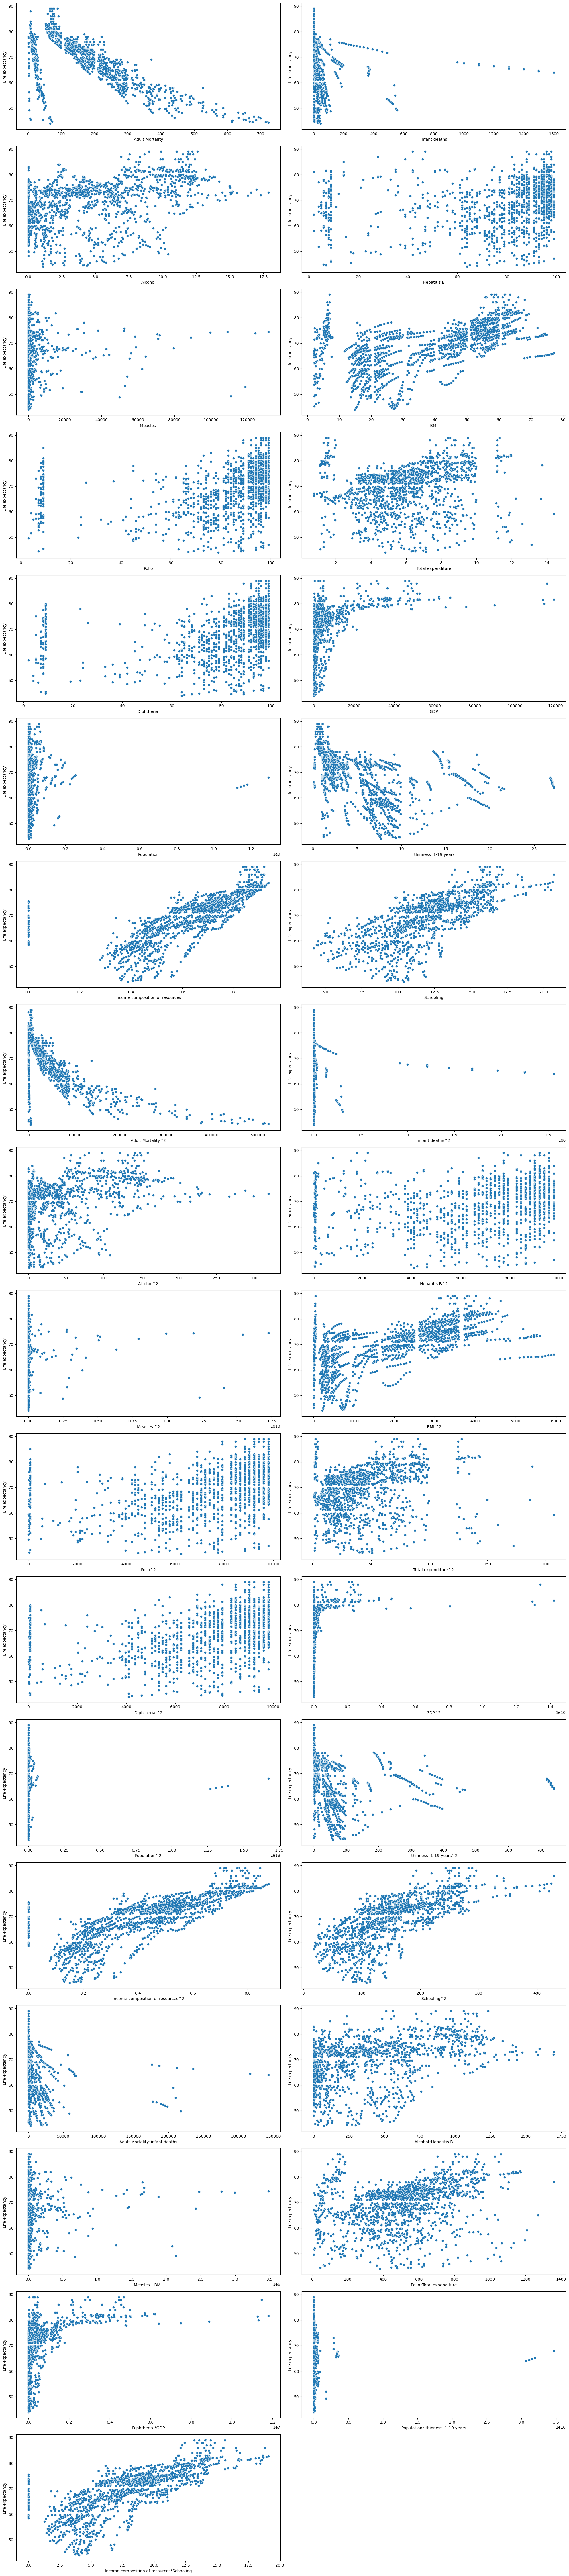

In [44]:
# Graficando X vs y evitando la gráfica de Life expectancy vs Life expectancy
import matplotlib.pyplot as plt
import seaborn as sns
# Número de gráficos que necesitas
columns_to_plot = [col for col in final_df.columns if col != 'Life expectancy ']
num_graphs = len(columns_to_plot)

ncols = 2  # Número de columnas fijas
nrows = int(np.ceil(num_graphs / ncols))  # Calcula el número de filas necesarias


fig, axs = plt.subplots(nrows, ncols, figsize=(20, nrows * 5))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    sns.scatterplot(data=final_df, x=column, y='Life expectancy ', ax=axs[i])

# Desactivar los subplots no utilizados
for j in range(num_graphs, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [45]:
# Implementando la fórmula directa de Regresión lineal múltiple
X = final_df.drop(columns='Life expectancy ')
y = final_df['Life expectancy ']

X_np = X.to_numpy()
y_np = y.to_numpy()

X_np.shape, y_np.shape

((1649, 35), (1649,))

In [46]:
# Modelo de regresion lineal multiple
beta = fit_model(X_np, y_np)
print("Los coeficientes son: ", beta)


Los coeficientes son:  (array([ 0.07276329, -0.10340446, -0.18210298,  0.20016337,  0.01268828,
        0.01539157, -0.08500526,  0.03393918, -0.36242215,  0.73686881,
        0.00988002, -0.37648582, -0.10607508,  0.19752976, -0.42329008,
       -0.03182842, -0.05542406, -0.29576641,  0.01969459,  0.01880983,
        0.05652631, -0.04241047,  0.53265629, -0.00836126, -0.05081046,
        0.39384124,  1.02055566,  0.11094838,  0.02090734,  0.11747444,
        0.0092962 ,  0.03622271, -0.70230681,  0.05100309, -0.64385561]), StandardScaler(), StandardScaler())


In [47]:
validacion_cruzada(X_np, y_np, 5)

MSE =  14.274511460132596
MAE =  2.553970031570719
R^2 =  0.8008212715563825
MSE =  10.82209179044934
MAE =  2.519580199297883
R^2 =  0.853794312214851
MSE =  10.014386510878426
MAE =  2.331230425474868
R^2 =  0.8696006441716084
MSE =  11.45547159411425
MAE =  2.476862924703758
R^2 =  0.8639939852960448
MSE =  11.77069167530588
MAE =  2.407790285488747
R^2 =  0.8517197079066726
MSE Promedio: 11.667430606176097   MAE Promedio: 2.457886773307195   R^2 Promedio: 0.847985984229112


### 7. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado). 

In [48]:
# Generando regersión Ridge con descenso de gradientes para df_clean

def grad_ridge(X, y, beta, alpha, lamb):
    n = len(y)
    y_pred = X @ beta
    res = y - y_pred
    tmp = res[:,np.newaxis] * X # Esto sirve para operar elemento a elemento
    return -2/n * tmp.sum(axis=0) + 2*lamb*beta

In [49]:
# Generando regersión Ridge con descenso de gradientes para df_clean

def fit_model_ridge(X,y, alpha, maxit, lamb):
        
        # Normalización de los datos
        scaler_X = StandardScaler()
        X_scaled = scaler_X.fit_transform(X)
    
        scaler_y = StandardScaler()
        y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
    
        # de predictores
        n = X.shape[1]
        #print(f"Numero de predictores: {n}")
    
        #Inicializando beta
        beta = 2*np.random.rand(n) - 1.0
        #print(f"Beta inicial: {beta}")
    
        #Optimizando el algoritmo
        it = 0
        while (np.linalg.norm(grad_ridge(X_scaled, y_scaled, beta, alpha, lamb)) > 1e-4) and (it < maxit):
            beta = beta - alpha * grad_ridge(X_scaled, y_scaled, beta, alpha, lamb)
            
            # Chequeo para valores extremos de beta
            if np.any(np.abs(beta) > 1e10):  # Si algún valor en beta es extremadamente grande
                afafa = 0
                #print(f"Warning: Valores de Beta empieza a hacerse grandes en iteración {it}")
                #break
    
            # Chequeo de NaN en beta
            if np.any(np.isnan(beta)):
                print(f"NaN se detectó en la iteración {it}")
                break
    
            it = it + 1
            #print(it)
        return beta, scaler_X, scaler_y

In [50]:
df_clean_ridge = df_clean.copy()
X = df_clean_ridge.drop(columns='Life expectancy ')
y = df_clean_ridge['Life expectancy ']

X_np = X.to_numpy()
y_np = y.to_numpy()

X_np.shape, y_np.shape

((1649, 14), (1649,))

In [51]:
beta = fit_model_ridge(X_np, y_np, alpha=0.005, maxit=10000, lamb=0.1)
print("Los coeficientes son: ", beta)

Los coeficientes son:  (array([-0.38303956, -0.02280727, -0.05172093,  0.0017243 ,  0.00770393,
        0.09641199,  0.02974441, -0.00401481,  0.0504755 ,  0.08888828,
        0.02065827, -0.05218345,  0.22319087,  0.2470206 ]), StandardScaler(), StandardScaler())


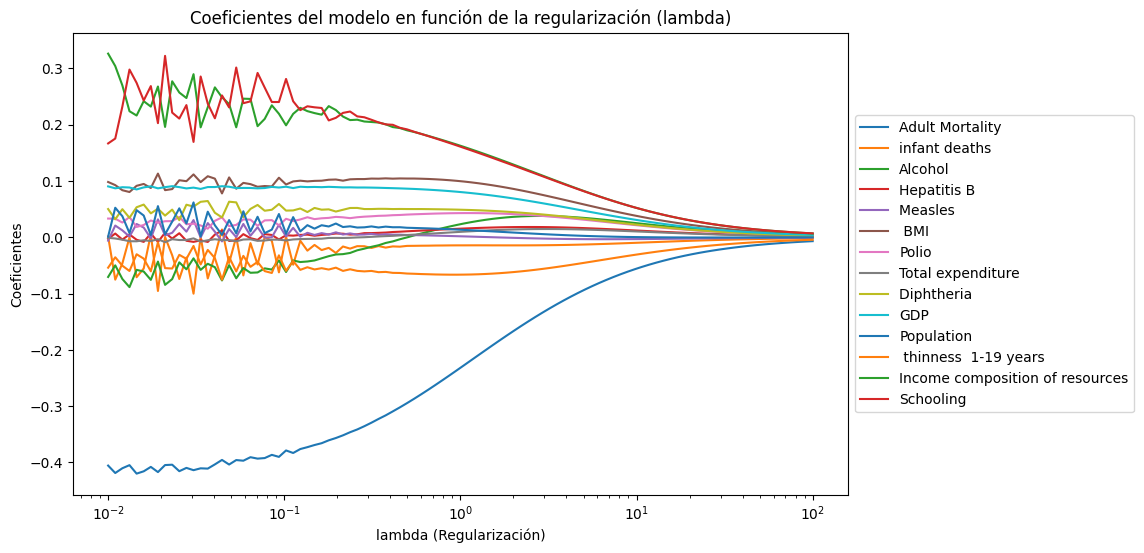

In [166]:
# Definimos los valores de lambda en una escala logarítmica
alphas = np.logspace(-2, 2, 100)
coefs = []
#print(alphas)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

# Bucle para ajustar el modelo a cada valor de lambda
for lamb in alphas:
    beta, _, _ = fit_model_ridge(X_np, y_np, alpha=.005, maxit=1000, lamb=lamb)
    coefs.append(beta)


coefs = np.array(coefs)

# Generamos la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(alphas, coefs)

ax.set_xscale('log')
#Nota de que variable pertenece a qué color acomodada a la izquierda del plot
ax.legend(X.columns, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('lambda (Regularización)')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización (lambda)')

plt.axis('tight')
plt.show()

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.14305e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.14308e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.14311e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.14315e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\pal

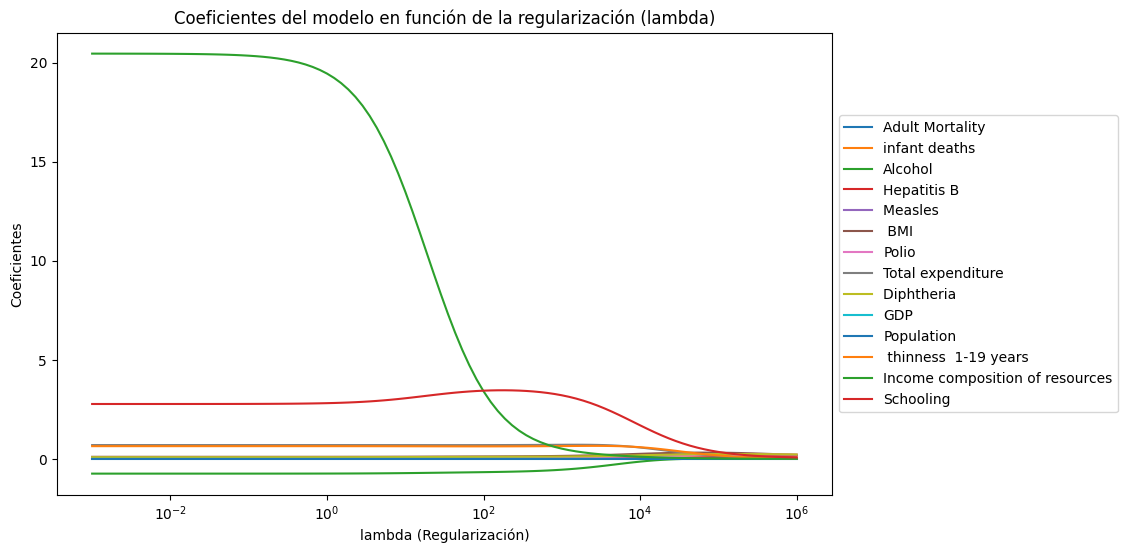

In [168]:
from sklearn.linear_model import Ridge
alphas = np.logspace(-3, 6, 100)
coefs_sklearn = []
for lamb in alphas:
    ridge = Ridge(alpha=lamb, fit_intercept=False)
    ridge.fit(X_np, y_np)
    coefs_sklearn.append(ridge.coef_)

coefs_sklearn = np.array(coefs_sklearn)

# Generamos la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(alphas, coefs_sklearn)

ax.set_xscale('log')
ax.legend(X.columns, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('lambda (Regularización)')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización (lambda)')
plt.axis('tight')
plt.show()


### 8. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.521e+04, tolerance: 8.047e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.208e+04, tolerance: 8.047e+02
  model = cd_fast.enet_coordinate_descent(


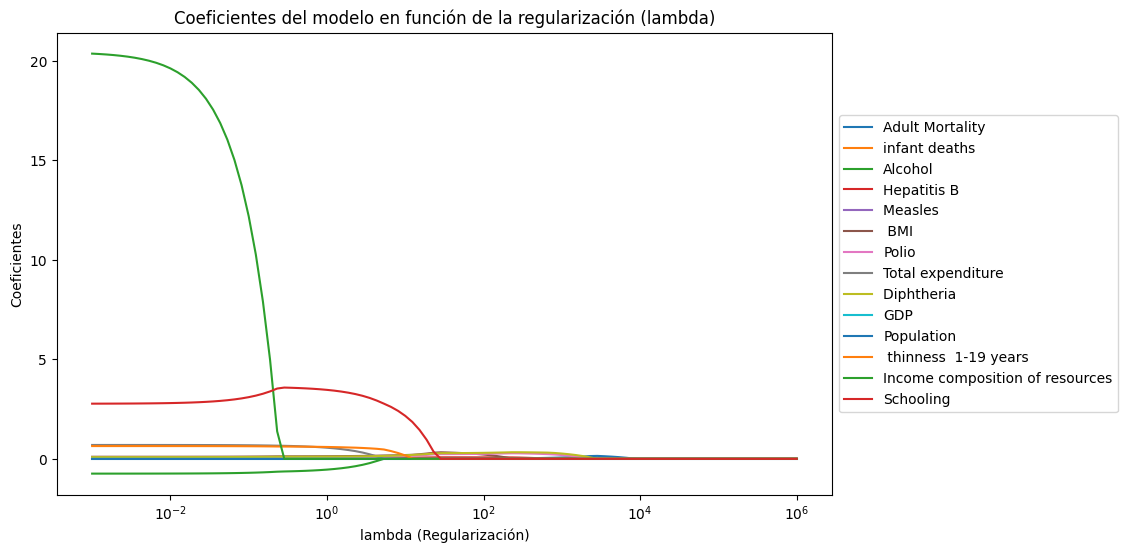

In [169]:
from sklearn.linear_model import Lasso

coefs_lasso = []
for lamb in alphas:
    lasso = Lasso(alpha=lamb, fit_intercept=False)
    lasso.fit(X_np, y_np)
    coefs_lasso.append(lasso.coef_)

coefs_lasso = np.array(coefs_lasso)

# Generamos la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(alphas, coefs_lasso)

ax.set_xscale('log')
ax.legend(X.columns, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('lambda (Regularización)')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización (lambda)')
plt.axis('tight')
plt.show()

###  9.Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

#### A. ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?

Considerando el comportamiento de los datos se podría decir que pueden existir mejores modelos para lograr una efectividad mayor, ya que el comportamiento de muchas variables no tiene a ser de tipo lineal, sólo Income composition of resources y Schooling, pueden llegar a tener un mejor comportamiento la el modelo de regresión linea, incluso en la gráfica Ridge, indica que pueden tener una mayor importancia sobre el modelo.

#### B. ¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.

Al generar un método de validación cruzada nos aseguramos que todos los datos están siendo utilizados para entrenar en diferentes iteraciones, esto para no lograr un sobreajuste.
En los diferentes métodos se obtuvieron diferentes resultados, pero el que tuvo un promedio con menos errores fue LOOCV, sin embargo, tenía pocas observaciones con mucho error y muchas observaciones con poco error, por eso tiene un promedio "normal". Para Monte Carlo, su promedio de errores es consistente, en todas las iteraciones mantiene un error similar, lo que genera que tenga una distribución normal al graficar sus errores.

#### C. ¿Qué modelo es mejor para los datos del problema, el lineal o el cuadrático? ¿Por qué?

Para los datos presentados se debe de hacer la prueba con un modelo cuadrático para combrobar cuál puede llegar a ser mejor, por el momento el modelo lineal se comportó de cierta manera "adecuado" y con algún método para selección de variables y validación cruzada podría llegar a ser más efecto para predecir.

### D.¿Qué variables son más relevantes para el modelo según Ridge y Lasso?

Las variables más relevantes según Ridge son: Income composition of resources y Schooling.
Las variables más relevantes según Lazzo son: Population y Diphtheria.


#### E. ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?

Que entre mejor uso de los recursos la variable predictora (Life expectancy) aumenta, con una correlación de .73, también, entre más scolaridad en el país aumenta la espectativa de vida con una correlación de .78.

## Seguimiento Telemétrico de la Enfermedad de Parkinson

In [44]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons_telemonitoring = fetch_ucirepo(id=189) 
  
# data (as pandas dataframes) 
X = parkinsons_telemonitoring.data.features 
y = parkinsons_telemonitoring.data.targets 
  
print(X)
print(y)
print(X.shape)
print(y.shape)

# metadata 
print(parkinsons_telemonitoring.metadata) 
  
# variable information 
print(parkinsons_telemonitoring.variables)



      age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0      72     5.6431    0.00662     0.000034     0.00401      0.00317   
1      72    12.6660    0.00300     0.000017     0.00132      0.00150   
2      72    19.6810    0.00481     0.000025     0.00205      0.00208   
3      72    25.6470    0.00528     0.000027     0.00191      0.00264   
4      72    33.6420    0.00335     0.000020     0.00093      0.00130   
...   ...        ...        ...          ...         ...          ...   
5870   61   142.7900    0.00406     0.000031     0.00167      0.00168   
5871   61   149.8400    0.00297     0.000025     0.00119      0.00147   
5872   61   156.8200    0.00349     0.000025     0.00152      0.00187   
5873   61   163.7300    0.00281     0.000020     0.00128      0.00151   
5874   61   170.7300    0.00282     0.000021     0.00135      0.00166   

      Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0        0.01204  0.02565        0.230       0.01438 

In [45]:
y.drop(columns=['total_UPDRS'], axis=1, inplace=True)
y

C:\Users\palmi\AppData\Local\Temp\ipykernel_54828\1835047426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop(columns=['total_UPDRS'], axis=1, inplace=True)


motor_UPDRS
0          28.199
1          28.447
2          28.695
3          28.905
4          29.187
...           ...
5870       22.485
5871       21.988
5872       21.495
5873       21.007
5874       20.513

[5875 rows x 1 columns]

In [46]:
X.columns

Index(['age', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE', 'sex'],
      dtype='object')

In [47]:
X.drop(columns=['test_time','Jitter:PPQ5','Shimmer:APQ3','NHR'], axis=1, inplace=True)
X

C:\Users\palmi\AppData\Local\Temp\ipykernel_54828\493501579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['test_time','Jitter:PPQ5','Shimmer:APQ3','NHR'], axis=1, inplace=True)


age  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:DDP  Shimmer  \
0      72    0.00662     0.000034     0.00401     0.01204  0.02565   
1      72    0.00300     0.000017     0.00132     0.00395  0.02024   
2      72    0.00481     0.000025     0.00205     0.00616  0.01675   
3      72    0.00528     0.000027     0.00191     0.00573  0.02309   
4      72    0.00335     0.000020     0.00093     0.00278  0.01703   
...   ...        ...          ...         ...         ...      ...   
5870   61    0.00406     0.000031     0.00167     0.00500  0.01896   
5871   61    0.00297     0.000025     0.00119     0.00358  0.02315   
5872   61    0.00349     0.000025     0.00152     0.00456  0.02499   
5873   61    0.00281     0.000020     0.00128     0.00383  0.01484   
5874   61    0.00282     0.000021     0.00135     0.00406  0.01907   

      Shimmer(dB)  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA     HNR     RPDE  \
0           0.230       0.01309        0.01662      0.04314  21.640  0.41888   
1           0.179       0.01072        0.01689      0.02982  27.183  0.43493   
2           0.181       0.00844        0.01458      0.02202  23.047  0.46222   
3           0.327       0.01265        0.01963      0.03317  24.445  0.48730   
4           0.176       0.00929        0.01819      0.02036  26.126  0.47188   
...           ...           ...            ...          ...     ...      ...   
5870        0.160       0.01133        0.01549      0.02920  22.369  0.64215   
5871        0.215       0.01277        0.01904      0.03157  22.886  0.52598   
5872        0.244       0.01456        0.01877      0.04112  25.065  0.47792   
5873        0.131       0.00870        0.01307      0.02078  24.422  0.56865   
5874        0.171       0.01154        0.01470      0.02839  23.259  0.58608   

          DFA      PPE  sex  
0     0.54842  0.16006    0  
1     0.56477  0.10810    0  
2     0.54405  0.21014    0  
3     0.57794  0.33277    0  
4     0.56122  0.19361    0  
...       ...      ...  ...  
5870  0.55314  0.21367    0  
5871  0.56518  0.12621    0  
5872  0.57888  0.14157    0  
5873  0.56327  0.14204    0  
5874  0.57077  0.15336    0  

[5875 rows x 15 columns]

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   Jitter(%)      5875 non-null   float64
 2   Jitter(Abs)    5875 non-null   float64
 3   Jitter:RAP     5875 non-null   float64
 4   Jitter:DDP     5875 non-null   float64
 5   Shimmer        5875 non-null   float64
 6   Shimmer(dB)    5875 non-null   float64
 7   Shimmer:APQ5   5875 non-null   float64
 8   Shimmer:APQ11  5875 non-null   float64
 9   Shimmer:DDA    5875 non-null   float64
 10  HNR            5875 non-null   float64
 11  RPDE           5875 non-null   float64
 12  DFA            5875 non-null   float64
 13  PPE            5875 non-null   float64
 14  sex            5875 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 688.6 KB


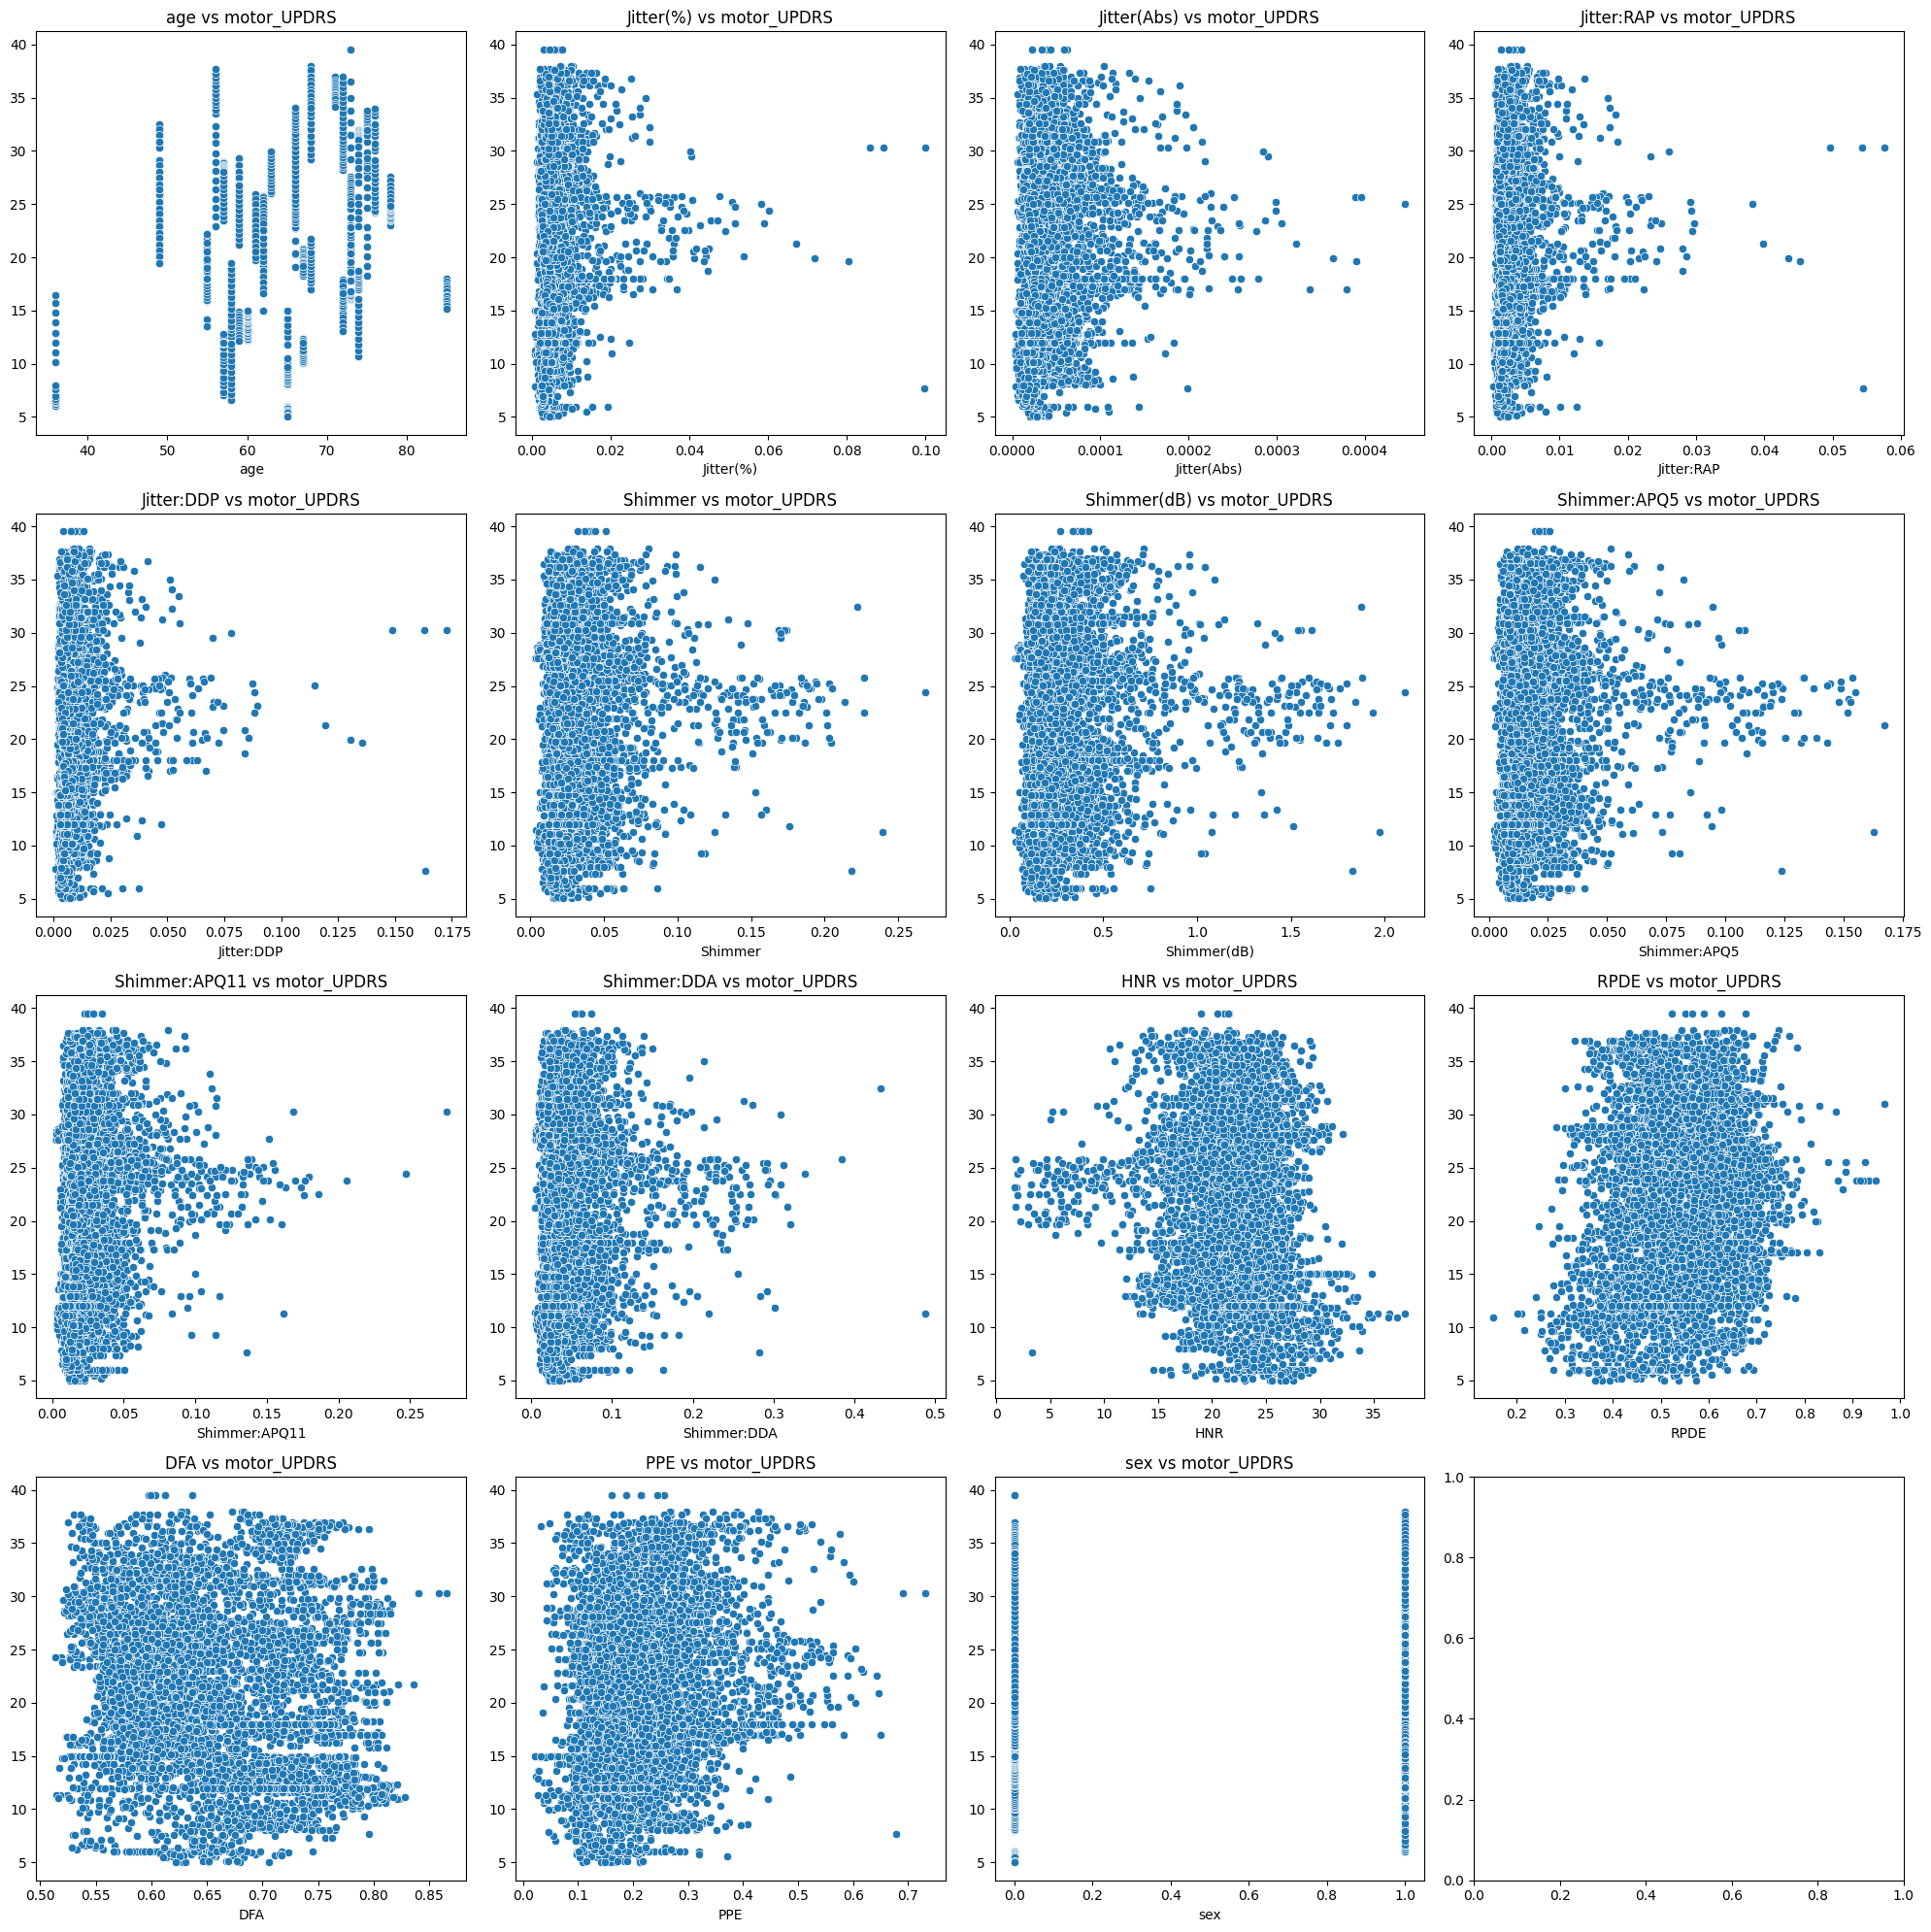

In [5]:
# Graficando cada variable vs la columna "motor_UPDRS"
import matplotlib.pyplot as plt
import seaborn as sns

# Transformando y a un array de una dimensión
y_arr = y.values.flatten()

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, column in enumerate(X.columns):
    if column != 'motor_UPDRS':
        sns.scatterplot(data=X, x=column, y=y_arr, ax=axs[i // 4, i % 4])
        axs[i // 4, i % 4].set_title(f'{column} vs motor_UPDRS')

# Ajustar el layout para que no se sobrepongan las gráficas
plt.tight_layout()
plt.show()

### 1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [49]:
# Generando modelo de regresión lineal múltiple con librerías y haciendo validación cruzada
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Creando el modelo
model = LinearRegression()

# Realizando validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculando el promedio de los scores
print(f"Error cuadrático medio: {round(np.mean(-scores),2)}")


Error cuadrático medio: 76.88%


In [77]:
df_X = X.copy()
df_y = y.copy()

df_X, df_y

(      age  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:DDP  Shimmer  \
 0      72    0.00662     0.000034     0.00401     0.01204  0.02565   
 1      72    0.00300     0.000017     0.00132     0.00395  0.02024   
 2      72    0.00481     0.000025     0.00205     0.00616  0.01675   
 3      72    0.00528     0.000027     0.00191     0.00573  0.02309   
 4      72    0.00335     0.000020     0.00093     0.00278  0.01703   
 ...   ...        ...          ...         ...         ...      ...   
 5870   61    0.00406     0.000031     0.00167     0.00500  0.01896   
 5871   61    0.00297     0.000025     0.00119     0.00358  0.02315   
 5872   61    0.00349     0.000025     0.00152     0.00456  0.02499   
 5873   61    0.00281     0.000020     0.00128     0.00383  0.01484   
 5874   61    0.00282     0.000021     0.00135     0.00406  0.01907   
 
       Shimmer(dB)  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA     HNR     RPDE  \
 0           0.230       0.01309        0.01662      0.04314  21.

### 2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

#### Método Filter

In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [121]:
def filter__selection(x, y, n_features):
    print("----- Optimal selection of number of features -----")

    n_feats = n_features

    mse_nfeat = []
    mae_nfeat = []
    r2_nfeat = []
    for n_feat in n_feats:
        print('---- n features =', n_feat)
        
        mse_cv = []
        mae_cv = []
        r2_cv = []

        kf = KFold(n_splits=5, shuffle = True)

        for train_index, test_index in kf.split(x):
        
            # Training phase
            x_train = x[train_index, :]
            y_train = y[train_index]     
            
            fselection_cv = SelectKBest(r_regression, k = n_feat)
            fselection_cv.fit(x_train, y_train)
            x_train = fselection_cv.transform(x_train)

            regr_cv = LinearRegression()
            regr_cv.fit(x_train, y_train)

            # Test phase
            x_test = fselection_cv.transform(x[test_index, :])
            y_test = y[test_index]
            y_pred = regr_cv.predict(x_test)
        
            mse_i = mean_squared_error(y_test, y_pred)
            mse_cv.append(mse_i)
        
            mae_i = mean_absolute_error(y_test, y_pred)
            mae_cv.append(mae_i)

            r2_i = r2_score(y_test, y_pred)    
            r2_cv.append(r2_i)      
        

        mse = np.average(mse_cv)
        mse_nfeat.append(mse)
        
        mae = np.average(mae_cv)
        mae_nfeat.append(mae)
        
        r2 = np.average(r2_cv)
        r2_nfeat.append(r2)
        
        print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

    opt_index = np.argmin(mse_nfeat)
    opt_features = n_feats[opt_index]
    print("Optimal number of features: ", opt_features)

    fig, axs = plt.subplots(1, 3, tight_layout=True)
    axs[0].plot(n_feats, mse_nfeat)
    axs[0].set_xlabel("k")
    axs[0].set_ylabel("MSE")

    axs[1].plot(n_feats, mae_nfeat)
    axs[1].set_xlabel("k")
    axs[1].set_ylabel("MAE")

    axs[2].plot(n_feats, r2_nfeat)
    axs[2].set_xlabel("k")
    axs[2].set_ylabel("r^2")

    plt.show()

    return opt_features


----- Optimal selection of number of features -----
---- n features = 1
MSE: 61.18050430804374   MAE: 6.715571167507814   R^2: 0.0732131614795893
---- n features = 2
MSE: 60.04990390736022   MAE: 6.650276404388995   R^2: 0.09067836505141291
---- n features = 3
MSE: 60.03634675591476   MAE: 6.638499316453741   R^2: 0.09042654447251224
---- n features = 4
MSE: 60.03768081675141   MAE: 6.627608507088579   R^2: 0.09083604155507537
---- n features = 5
MSE: 59.78184462585343   MAE: 6.612851752854485   R^2: 0.0942793769460738
---- n features = 6
MSE: 59.692782998713824   MAE: 6.614683440751795   R^2: 0.0957268557724256
---- n features = 7
MSE: 59.595518253759636   MAE: 6.612527029012449   R^2: 0.0971021308047634
---- n features = 8
MSE: 59.58193378859703   MAE: 6.611305188832196   R^2: 0.09763615667853402
---- n features = 9
MSE: 59.55209136688317   MAE: 6.608117735497109   R^2: 0.09813081089169173
---- n features = 10
MSE: 59.59815916027962   MAE: 6.610330835548313   R^2: 0.0965567966100527


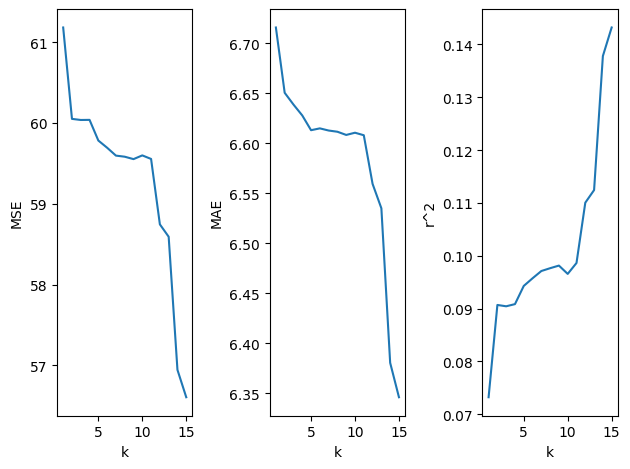

Selected features:  age
Selected features:  Jitter(%)
Selected features:  Jitter(Abs)
Selected features:  Jitter:RAP
Selected features:  Jitter:DDP
Selected features:  Shimmer
Selected features:  Shimmer(dB)
Selected features:  Shimmer:APQ5
Selected features:  Shimmer:APQ11
Selected features:  Shimmer:DDA
Selected features:  HNR
Selected features:  RPDE
Selected features:  DFA
Selected features:  PPE
Selected features:  sex
Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14']
Model coefficients:  [[ 1.96519953e-01  4.36313941e+01 -6.28644125e+04 -3.69487912e+04
   1.24265425e+04  1.01730529e+02 -5.85832544e+00 -1.93038315e+02
   9.54677288e+01 -2.21953012e+01 -3.89430398e-01  7.68249643e-01
  -2.16521331e+01  1.88680948e+01 -1.21367667e+00]]
Model intercept:  [29.25034623]


In [124]:
X_np = df_X.to_numpy()
y_np = df_y.to_numpy().ravel()

#n_features = X_np.shape[1]
#n_features = np.arange(1, n_features + 1)
n_features = list(range(1, X_np.shape[1] + 1))
opt_features = filter__selection(X_np, y_np, n_features)

# Fit model with optimal number of features
regr = LinearRegression()
fselection = SelectKBest(r_regression, k = opt_features)
fselection.fit(X_np, y_np)

for i in range(len(fselection.get_support())): 
    if fselection.get_support()[i]:
        print("Selected features: ",df_X.columns[i])
print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(X_np)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)



### 3,Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.


#### Método Wrapper

In [36]:
from sklearn.feature_selection import SequentialFeatureSelector

In [129]:
def wrapper_selection(x,y, n_features):
    print("----- Optimal selection of number of features -----")
    n_feats = n_features

    mse_nfeat = []
    mae_nfeat = []
    r2_nfeat = []
    for n_feat in n_feats:
        print('---- n features =', n_feat)
        
        mse_cv = []
        mae_cv = []
        r2_cv = []

        kf = KFold(n_splits=5, shuffle = True)

        for train_index, test_index in kf.split(x):
        
            # Training phase
            x_train = x[train_index, :]
            y_train = y[train_index]     

            regr_cv = LinearRegression()

            
            fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select = "auto")
            fselection_cv.fit(x_train, y_train)
            x_train = fselection_cv.transform(x_train)

            regr_cv.fit(x_train, y_train)

            # Test phase
            x_test = fselection_cv.transform(x[test_index, :])
            y_test = y[test_index]
            y_pred = regr_cv.predict(x_test)
        
            mse_i = mean_squared_error(y_test, y_pred)
            mse_cv.append(mse_i)
        
            mae_i = mean_absolute_error(y_test, y_pred)
            mae_cv.append(mae_i)

            r2_i = r2_score(y_test, y_pred)    
            r2_cv.append(r2_i)      
        

        mse = np.average(mse_cv)
        mse_nfeat.append(mse)
        
        mae = np.average(mae_cv)
        mae_nfeat.append(mae)
        
        r2 = np.average(r2_cv)
        r2_nfeat.append(r2)
        
        print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

    opt_index = np.argmin(mse_nfeat)
    opt_features = n_feats[opt_index]
    print("Optimal number of features: ", opt_features)

    fig, axs = plt.subplots(1, 3, tight_layout=True)
    axs[0].plot(n_feats, mse_nfeat)
    axs[0].set_xlabel("features")
    axs[0].set_ylabel("MSE")

    axs[1].plot(n_feats, mae_nfeat)
    axs[1].set_xlabel("features")
    axs[1].set_ylabel("MAE")

    axs[2].plot(n_feats, r2_nfeat)
    axs[2].set_xlabel("features")
    axs[2].set_ylabel("r^2")

    plt.show()

    return opt_features


----- Optimal selection of number of features -----
---- n features = 1
MSE: 58.88978716814447   MAE: 6.571484471403795   R^2: 0.10818635352885524
---- n features = 2
MSE: 59.21743429929476   MAE: 6.593539850588182   R^2: 0.1038060221217199
---- n features = 3
MSE: 59.200944871322555   MAE: 6.592100852614601   R^2: 0.102902468842249
---- n features = 4
MSE: 58.947546421458775   MAE: 6.576366108346706   R^2: 0.10737203034365024
---- n features = 5
MSE: 59.03190510803139   MAE: 6.576060823940002   R^2: 0.10597611799087339
---- n features = 6
MSE: 59.342975926425844   MAE: 6.6023096852367145   R^2: 0.10041193962339645
---- n features = 7
MSE: 59.25717467924771   MAE: 6.596511954625953   R^2: 0.10293243617229615
---- n features = 8
MSE: 59.01548686547053   MAE: 6.578862021061539   R^2: 0.10598285903063653
---- n features = 9
MSE: 59.070841449164746   MAE: 6.58402013811654   R^2: 0.10464404829430826
---- n features = 10
MSE: 59.18571072823181   MAE: 6.5804134859491485   R^2: 0.1036975482853

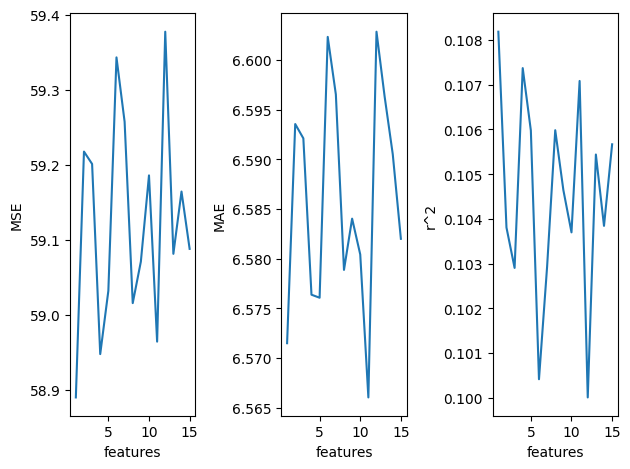

Selected features:  age
Selected features:  ['x0']
Model coefficients:  [[0.25218975]]
Model intercept:  [4.95308778]


In [131]:
X_np = df_X.to_numpy()
y_np = df_y.to_numpy().ravel()

n_features = list(range(1, X_np.shape[1] + 1))

opt_features = wrapper_selection(X_np, y_np, n_features)

# Fit model with optimal number of features
regr = LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(X_np, y_np)

for i in range(len(fselection.get_support())): 
    if fselection.get_support()[i]:
        print("Selected features: ",df_X.columns[i])
print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(X_np)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

### 4.Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.

#### Método Recursivo

In [95]:
from sklearn.feature_selection import RFE

In [128]:
def recursive_selection(x,y,n_features):
    print("----- Optimal selection of number of features -----")

    n_feats = n_features

    mse_nfeat = []
    mae_nfeat = []
    r2_nfeat = []
    for n_feat in n_feats:
        print('---- n features =', n_feat)
        
        mse_cv = []
        mae_cv = []
        r2_cv = []

        kf = KFold(n_splits=5, shuffle = True)

        for train_index, test_index in kf.split(x):
        
            # Training phase
            x_train = x[train_index, :]
            y_train = y[train_index]     

            regr_cv = LinearRegression()

            fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
            fselection_cv.fit(x_train, y_train)
            x_train = fselection_cv.transform(x_train)

            regr_cv.fit(x_train, y_train)

            # Test phase
            x_test = fselection_cv.transform(x[test_index, :])
            y_test = y[test_index]
            y_pred = regr_cv.predict(x_test)
        
            mse_i = mean_squared_error(y_test, y_pred)
            mse_cv.append(mse_i)
        
            mae_i = mean_absolute_error(y_test, y_pred)
            mae_cv.append(mae_i)

            r2_i = r2_score(y_test, y_pred)    
            r2_cv.append(r2_i)      
        

        mse = np.average(mse_cv)
        mse_nfeat.append(mse)
        
        mae = np.average(mae_cv)
        mae_nfeat.append(mae)
        
        r2 = np.average(r2_cv)
        r2_nfeat.append(r2)
        
        print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

    opt_index = np.argmin(mse_nfeat)
    opt_features = n_feats[opt_index]
    #print("Optimal number of features: ", opt_features)

    fig, axs = plt.subplots(1, 3, tight_layout=True)
    axs[0].plot(n_feats, mse_nfeat)
    axs[0].set_xlabel("features")
    axs[0].set_ylabel("MSE")

    axs[1].plot(n_feats, mae_nfeat)
    axs[1].set_xlabel("features")
    axs[1].set_ylabel("MAE")

    axs[2].plot(n_feats, r2_nfeat)
    axs[2].set_xlabel("features")
    axs[2].set_ylabel("r^2")

    plt.show()
    return opt_features



----- Optimal selection of number of features -----
---- n features = 1
MSE: 65.75990526085835   MAE: 6.9504375732296255   R^2: 0.0038676653544396757
---- n features = 2
MSE: 65.7627590450476   MAE: 6.94906302811125   R^2: 0.0039726690530456745
---- n features = 3
MSE: 65.78426513791153   MAE: 6.951342021020844   R^2: 0.004229296423902973
---- n features = 4
MSE: 65.35472665270053   MAE: 6.941635647313044   R^2: 0.009310102400269171
---- n features = 5
MSE: 64.57067600937253   MAE: 6.864245886088801   R^2: 0.02122988780755184
---- n features = 6
MSE: 63.643578727597706   MAE: 6.810747505477023   R^2: 0.03620617666039041
---- n features = 7
MSE: 63.8409161379282   MAE: 6.811172910236327   R^2: 0.033227140575342526
---- n features = 8
MSE: 60.964382952828046   MAE: 6.642364744978326   R^2: 0.07638463095635088
---- n features = 9
MSE: 60.37651403624598   MAE: 6.594998752285181   R^2: 0.08555596406720942
---- n features = 10
MSE: 60.20274602360678   MAE: 6.586963824208683   R^2: 0.08749218

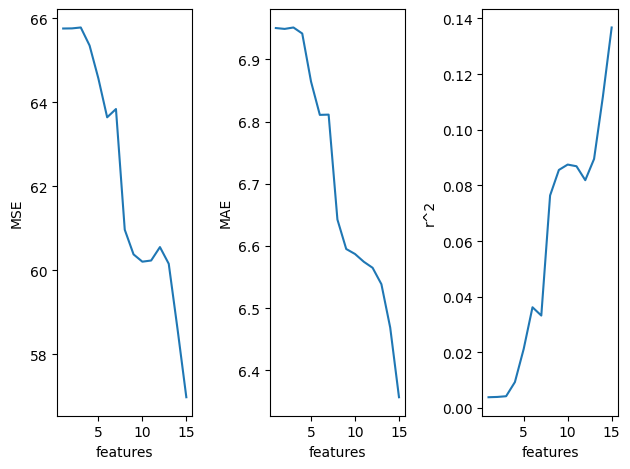

Selected features:  age
Selected features:  Jitter(%)
Selected features:  Jitter(Abs)
Selected features:  Jitter:RAP
Selected features:  Jitter:DDP
Selected features:  Shimmer
Selected features:  Shimmer(dB)
Selected features:  Shimmer:APQ5
Selected features:  Shimmer:APQ11
Selected features:  Shimmer:DDA
Selected features:  HNR
Selected features:  RPDE
Selected features:  DFA
Selected features:  PPE
Selected features:  sex
Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14']
Model coefficients:  [[ 1.96519953e-01  4.36313941e+01 -6.28644125e+04 -3.69487912e+04
   1.24265425e+04  1.01730529e+02 -5.85832544e+00 -1.93038315e+02
   9.54677288e+01 -2.21953012e+01 -3.89430398e-01  7.68249643e-01
  -2.16521331e+01  1.88680948e+01 -1.21367667e+00]]
Model intercept:  [29.25034623]


In [120]:
X_np = df_X.to_numpy()
y_np = df_y.to_numpy().ravel()

#Generando número de lista de características, no en rango
n_features = list(range(1, X.shape[1] + 1))

opt_features =recursive_selection(X_np, y_np, n_features)

# Fit model with optimal number of features
regr = LinearRegression()
fselection = RFE(regr, n_features_to_select = opt_features)
fselection.fit(X_np, y_np)

for i in range(len(fselection.support_)):
    if fselection.support_[i]:
        print("Selected features: ", X_np.columns[i])
print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(X_np)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

### 5.Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

#### Método Filter

In [133]:
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor

In [134]:
def filter_selection_knn(x, y, n_features):
    print("----- Optimal selection of number of features -----")

    n_feats = n_features

    mse_nfeat = []
    mae_nfeat = []
    r2_nfeat = []
    for n_feat in n_feats:
        print('---- n features =', n_feat)
        
        mse_cv = []
        mae_cv = []
        r2_cv = []

        kf = KFold(n_splits=5, shuffle=True)

        for train_index, test_index in kf.split(x):
        
            # Training phase
            x_train = x[train_index, :]
            y_train = y[train_index]     
            
            fselection_cv = SelectKBest(f_regression, k=n_feat)
            fselection_cv.fit(x_train, y_train)
            x_train = fselection_cv.transform(x_train)

            regr_cv = KNeighborsRegressor(n_neighbors=5)
            regr_cv.fit(x_train, y_train)

            # Test phase
            x_test = fselection_cv.transform(x[test_index, :])
            y_test = y[test_index]
            y_pred = regr_cv.predict(x_test)
        
            mse_i = mean_squared_error(y_test, y_pred)
            mse_cv.append(mse_i)
        
            mae_i = mean_absolute_error(y_test, y_pred)
            mae_cv.append(mae_i)

            r2_i = r2_score(y_test, y_pred)    
            r2_cv.append(r2_i)      
        
        mse = np.average(mse_cv)
        mse_nfeat.append(mse)
        
        mae = np.average(mae_cv)
        mae_nfeat.append(mae)
        
        r2 = np.average(r2_cv)
        r2_nfeat.append(r2)
        
        print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

    opt_index = np.argmin(mse_nfeat)
    opt_features = n_feats[opt_index]
    print("Optimal number of features: ", opt_features)

    fig, axs = plt.subplots(1, 3, tight_layout=True)
    axs[0].plot(n_feats, mse_nfeat)
    axs[0].set_xlabel("k")
    axs[0].set_ylabel("MSE")

    axs[1].plot(n_feats, mae_nfeat)
    axs[1].set_xlabel("k")
    axs[1].set_ylabel("MAE")

    axs[2].plot(n_feats, r2_nfeat)
    axs[2].set_xlabel("k")
    axs[2].set_ylabel("r^2")

    plt.show()

    return opt_features


----- Optimal selection of number of features -----
---- n features = 1
MSE: 47.93807842612235   MAE: 4.777798161702128   R^2: 0.2735967853129878
---- n features = 2
MSE: 24.317699499472884   MAE: 3.50677354893617   R^2: 0.6317032420804723
---- n features = 3
MSE: 23.282341369713496   MAE: 3.4210451370212764   R^2: 0.6463645401014431
---- n features = 4
MSE: 22.95872415920218   MAE: 3.379794491914894   R^2: 0.6524647820588922
---- n features = 5
MSE: 20.60775102665954   MAE: 3.174437045106383   R^2: 0.6874300594915018
---- n features = 6
MSE: 18.354891491138588   MAE: 2.9453916119148933   R^2: 0.7211186073673168
---- n features = 7
MSE: 17.097514459804323   MAE: 2.8492717004255317   R^2: 0.7410684955355642
---- n features = 8
MSE: 17.201069747154587   MAE: 2.84826245787234   R^2: 0.7392401489934868
---- n features = 9
MSE: 17.122566662749485   MAE: 2.8548182365957446   R^2: 0.740553009056006
---- n features = 10
MSE: 17.156309153872748   MAE: 2.85737290893617   R^2: 0.740310524844151
-

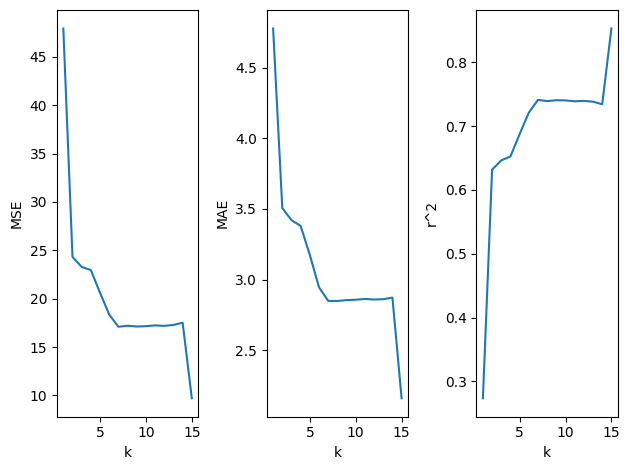

Selected features:  age
Selected features:  Jitter(%)
Selected features:  Jitter(Abs)
Selected features:  Jitter:RAP
Selected features:  Jitter:DDP
Selected features:  Shimmer
Selected features:  Shimmer(dB)
Selected features:  Shimmer:APQ5
Selected features:  Shimmer:APQ11
Selected features:  Shimmer:DDA
Selected features:  HNR
Selected features:  RPDE
Selected features:  DFA
Selected features:  PPE
Selected features:  sex
Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14']
Modelo ajustado con las características seleccionadas.


In [136]:
# Aplicación del modelo KNN con el número óptimo de características
X_np = df_X.to_numpy()
y_np = df_y.to_numpy().ravel()

n_features = list(range(1, X_np.shape[1] + 1))
opt_features = filter_selection_knn(X_np, y_np, n_features)

# Fit model with optimal number of features
regr = KNeighborsRegressor(n_neighbors=5)
fselection = SelectKBest(f_regression, k=opt_features)
fselection.fit(X_np, y_np)

for i in range(len(fselection.get_support())): 
    if fselection.get_support()[i]:
        print("Selected features: ", df_X.columns[i])
print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(X_np)
regr.fit(x_transformed, y_np)

print("Modelo ajustado con las características seleccionadas.")

#### Método Wrapper

In [137]:
def wrapper_selection_knn(x,y, n_features):
    print("----- Optimal selection of number of features -----")
    n_feats = n_features

    mse_nfeat = []
    mae_nfeat = []
    r2_nfeat = []
    for n_feat in n_feats:
        print('---- n features =', n_feat)
        
        mse_cv = []
        mae_cv = []
        r2_cv = []

        kf = KFold(n_splits=5, shuffle = True)

        for train_index, test_index in kf.split(x):
        
            # Training phase
            x_train = x[train_index, :]
            y_train = y[train_index]     

            regr_cv = KNeighborsRegressor(n_neighbors=5)

            
            fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select = "auto")
            fselection_cv.fit(x_train, y_train)
            x_train = fselection_cv.transform(x_train)

            regr_cv.fit(x_train, y_train)

            # Test phase
            x_test = fselection_cv.transform(x[test_index, :])
            y_test = y[test_index]
            y_pred = regr_cv.predict(x_test)
        
            mse_i = mean_squared_error(y_test, y_pred)
            mse_cv.append(mse_i)
        
            mae_i = mean_absolute_error(y_test, y_pred)
            mae_cv.append(mae_i)

            r2_i = r2_score(y_test, y_pred)    
            r2_cv.append(r2_i)      
        

        mse = np.average(mse_cv)
        mse_nfeat.append(mse)
        
        mae = np.average(mae_cv)
        mae_nfeat.append(mae)
        
        r2 = np.average(r2_cv)
        r2_nfeat.append(r2)
        
        print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

    opt_index = np.argmin(mse_nfeat)
    opt_features = n_feats[opt_index]
    print("Optimal number of features: ", opt_features)

    fig, axs = plt.subplots(1, 3, tight_layout=True)
    axs[0].plot(n_feats, mse_nfeat)
    axs[0].set_xlabel("features")
    axs[0].set_ylabel("MSE")

    axs[1].plot(n_feats, mae_nfeat)
    axs[1].set_xlabel("features")
    axs[1].set_ylabel("MAE")

    axs[2].plot(n_feats, r2_nfeat)
    axs[2].set_xlabel("features")
    axs[2].set_ylabel("r^2")

    plt.show()

    return opt_features


----- Optimal selection of number of features -----
---- n features = 1
MSE: 59.34760860100374   MAE: 6.595670610170674   R^2: 0.1013113187598083
---- n features = 2
MSE: 59.15797838057383   MAE: 6.584643462729472   R^2: 0.10412548607825049
---- n features = 3
MSE: 59.09706099599292   MAE: 6.590790209408409   R^2: 0.10442001820627171
---- n features = 4
MSE: 59.31629703268288   MAE: 6.595676643391144   R^2: 0.1021180059838904
---- n features = 5
MSE: 59.166585309002656   MAE: 6.589141758316506   R^2: 0.10320356138321247
---- n features = 6
MSE: 59.464386251312746   MAE: 6.599897948859976   R^2: 0.09929610664992088
---- n features = 7
MSE: 59.02223446636926   MAE: 6.580355751444176   R^2: 0.10575801198118387
---- n features = 8
MSE: 59.10332742000609   MAE: 6.585280306042774   R^2: 0.10308142063033432
---- n features = 9
MSE: 59.28310716865288   MAE: 6.5910971261368925   R^2: 0.10122552373044073
---- n features = 10
MSE: 59.01720172802909   MAE: 6.579123018445931   R^2: 0.10630569664291

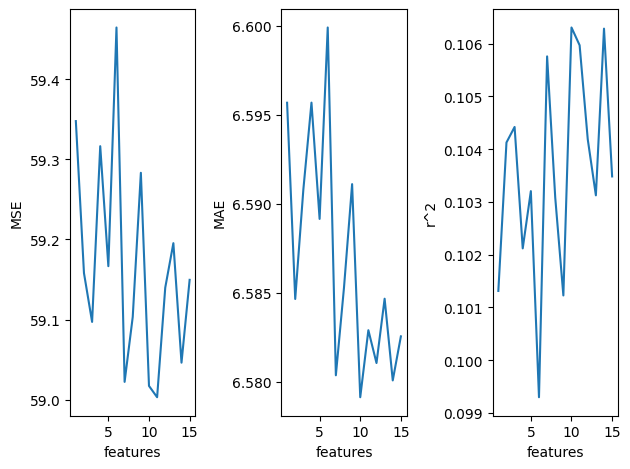

Selected features:  age
Selected features:  Jitter(%)
Selected features:  Jitter(Abs)
Selected features:  Jitter:RAP
Selected features:  Shimmer
Selected features:  Shimmer(dB)
Selected features:  Shimmer:APQ5
Selected features:  Shimmer:APQ11
Selected features:  Shimmer:DDA
Selected features:  DFA
Selected features:  sex
Selected features:  ['x0' 'x1' 'x2' 'x3' 'x5' 'x6' 'x7' 'x8' 'x9' 'x12' 'x14']
Modelo ajustado con las características seleccionadas.


In [139]:
X_np = df_X.to_numpy()
y_np = df_y.to_numpy().ravel()

n_features = list(range(1, X_np.shape[1] + 1))

opt_features = wrapper_selection(X_np, y_np, n_features)

# Fit model with optimal number of features
regr = KNeighborsRegressor(n_neighbors=5)
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(X_np, y_np)

for i in range(len(fselection.get_support())): 
    if fselection.get_support()[i]:
        print("Selected features: ",df_X.columns[i])
print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(X_np)
regr.fit(x_transformed, y)

print("Modelo ajustado con las características seleccionadas.")


#### Método Recursivo

In [143]:
def filter_selection_knn(x, y, n_features):
    print("----- Optimal selection of number of features -----")

    mse_nfeat = []
    mae_nfeat = []
    r2_nfeat = []
    for n_feat in n_features:
        print('---- n features =', n_feat)
        
        mse_cv = []
        mae_cv = []
        r2_cv = []

        kf = KFold(n_splits=5, shuffle=True)

        for train_index, test_index in kf.split(x):
        
            # Training phase
            x_train = x[train_index, :]
            y_train = y[train_index]     

            # Selección de características usando SelectKBest con f_regression
            fselection_cv = SelectKBest(score_func=f_regression, k=n_feat)
            x_train = fselection_cv.fit_transform(x_train, y_train)

            regr_cv = KNeighborsRegressor(n_neighbors=5)
            regr_cv.fit(x_train, y_train)

            # Test phase
            x_test = fselection_cv.transform(x[test_index, :])
            y_test = y[test_index]
            y_pred = regr_cv.predict(x_test)
        
            mse_i = mean_squared_error(y_test, y_pred)
            mse_cv.append(mse_i)
        
            mae_i = mean_absolute_error(y_test, y_pred)
            mae_cv.append(mae_i)

            r2_i = r2_score(y_test, y_pred)    
            r2_cv.append(r2_i)      

        mse = np.average(mse_cv)
        mse_nfeat.append(mse)
        
        mae = np.average(mae_cv)
        mae_nfeat.append(mae)
        
        r2 = np.average(r2_cv)
        r2_nfeat.append(r2)
        
        print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

    opt_index = np.argmin(mse_nfeat)
    opt_features = n_features[opt_index]
    print("Optimal number of features: ", opt_features)

    fig, axs = plt.subplots(1, 3, tight_layout=True)
    axs[0].plot(n_features, mse_nfeat)
    axs[0].set_xlabel("k")
    axs[0].set_ylabel("MSE")

    axs[1].plot(n_features, mae_nfeat)
    axs[1].set_xlabel("k")
    axs[1].set_ylabel("MAE")

    axs[2].plot(n_features, r2_nfeat)
    axs[2].set_xlabel("k")
    axs[2].set_ylabel("r^2")

    plt.show()

    return opt_features

----- Optimal selection of number of features -----
---- n features = 1
MSE: 47.04745162546417   MAE: 4.654235530212765   R^2: 0.28752017226450155
---- n features = 2
MSE: 25.244382466858482   MAE: 3.5689276051063827   R^2: 0.6172346133247337
---- n features = 3
MSE: 23.45651618999973   MAE: 3.4018965548936166   R^2: 0.6451133874608497
---- n features = 4
MSE: 23.260926520008915   MAE: 3.402694491914893   R^2: 0.6473635873043969
---- n features = 5
MSE: 20.926808299485074   MAE: 3.1923297531914896   R^2: 0.6830628390320189
---- n features = 6
MSE: 19.17933259698608   MAE: 3.0205230672340426   R^2: 0.7095325962528832
---- n features = 7
MSE: 18.030087376365888   MAE: 2.9308562042553192   R^2: 0.7271313714722586
---- n features = 8
MSE: 17.333891637300628   MAE: 2.8638473429787235   R^2: 0.7367862848562116
---- n features = 9
MSE: 17.036761498613107   MAE: 2.848948493617021   R^2: 0.7414572717506436
---- n features = 10
MSE: 16.944562390053513   MAE: 2.8317771812765957   R^2: 0.743028327

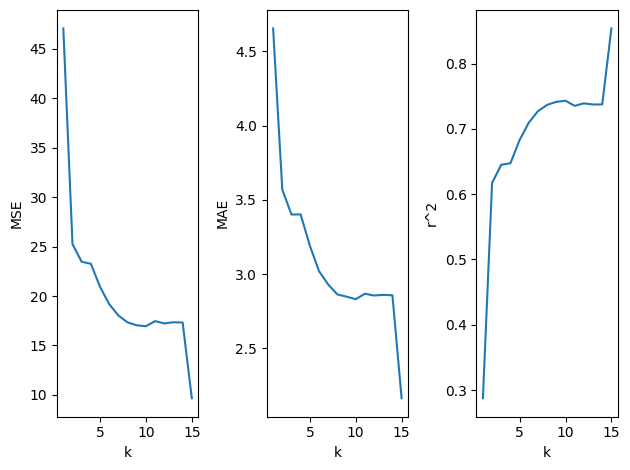

Selected features:  Index(['age', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'HNR', 'RPDE', 'DFA', 'PPE', 'sex'],
      dtype='object')
Modelo ajustado con las características seleccionadas.


In [146]:
X_np = df_X.to_numpy()
y_np = df_y.to_numpy().ravel()

# Generando lista de número de características
n_features = list(range(1, X_np.shape[1] + 1))

# Obtener el número óptimo de características
opt_features = filter_selection_knn(X_np, y_np, n_features)

# Ajustar el modelo con el número óptimo de características
regr = KNeighborsRegressor(n_neighbors=5)
fselection = SelectKBest(score_func=f_regression, k=opt_features)
X_selected = fselection.fit_transform(X_np, y_np)

selected_features = df_X.columns[fselection.get_support()]
print("Selected features: ", selected_features)

regr.fit(X_selected, y_np)
print("Modelo ajustado con las características seleccionadas.")

### 6.Busca al menos otros 4 modelos de regresión no lineal, y lleva a cabo los pasos del 1 al 5.

##### Función cross_validate_model

In [149]:
from sklearn.svm import SVR
def cross_validate_model(model, X, y, cv_folds=5, scoring='neg_mean_squared_error'):

    if isinstance(model, SVR):
        model = make_pipeline(StandardScaler(), model)
    
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X, y, cv=kf, scoring=scoring)
    
    mean_score = scores.mean()
    
    return mean_score

##### Función método Filter

In [150]:
def filter_selection(X, y, model, k_features=5):

    selector = SelectKBest(score_func=f_regression, k=k_features)
    pipeline = make_pipeline(StandardScaler(), selector, model)
    
    mean_score = cross_validate_model(pipeline, X, y, cv_folds=5, scoring='neg_mean_squared_error')

    selector.fit(X, y)
    selected_features = selector.get_support(indices=True)
    
    return mean_score, selected_features

##### Función método Wrapper

In [151]:
def wrapper_selection(X, y, model, k_features=5):

    sfs = SequentialFeatureSelector(model, n_features_to_select=k_features, direction='forward')
    pipeline = make_pipeline(StandardScaler(), sfs, model)
    
    mean_score = cross_validate_model(pipeline, X, y, cv_folds=5, scoring='neg_mean_squared_error')
    
    sfs.fit(X, y)
    selected_features = sfs.get_support(indices=True)
    
    return mean_score, selected_features

##### Función método Recursivo

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
def recursive_selection(X, y, model, k_features=5):

    if isinstance(model, (SVR, KNeighborsClassifier)):
        raise ValueError("RFE no es compatible con el modelo seleccionado. Usa un estimador que tenga coef_ o feature_importances_")
    
    rfe = RFE(model, n_features_to_select=k_features)
    pipeline = make_pipeline(StandardScaler(), rfe, model)
    
    mean_score = cross_validate_model(pipeline, X, y, cv_folds=5, scoring='neg_mean_squared_error')
    
    rfe.fit(X, y)
    selected_features = rfe.get_support(indices=True)
    
    return mean_score, selected_features

#### "Main"

In [159]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier

X = df_X.to_numpy()
y = df_y.to_numpy().ravel()

# Modelos a evaluar
models = {
    'Máquinas de Vectores de Soporte (SVR)': SVR(kernel='rbf'),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'MLPRegressor': MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=1000)
}


for name, model in models.items():
    print(f"\n\nEvaluando modelo: {name}")
    
    # Método Filter
    print("Método Filter")
    mean_score, selected_features = filter_selection(X, y, model)
    print(f"Error cuadrático medio: {-mean_score:.3f}")
    print(f"Número de características seleccionadas: {len(selected_features)}")
    print(f"Índices de características seleccionadas: {selected_features}")
    
    # Método Wrapper
    print("Método Wrapper")
    mean_score, selected_features = wrapper_selection(X, y, model)
    print(f"Error cuadrático medio: {-mean_score:.3f}")
    print(f"Número de características seleccionadas: {len(selected_features)}")
    print(f"Índices de características seleccionadas: {selected_features}")
    
    # Método Recursivo
    print("Método Recursivo")
    if isinstance(model, (SVR, KNeighborsClassifier)):
        print("El modelo no es compatible con RFE.")
    else:
        mean_score, selected_features = recursive_selection(X, y, model)
        print(f"Error cuadrático medio: {-mean_score:.3f}")
        print(f"Número de características seleccionadas: {len(selected_features)}")
        print(f"Índices de características seleccionadas: {selected_features}")
    
    print("\n")



Evaluando modelo: Máquinas de Vectores de Soporte (SVR)
Método Filter
Error cuadrático medio: 47.852
Número de características seleccionadas: 5
Índices de características seleccionadas: [ 0  8 10 11 13]
Método Wrapper
Error cuadrático medio: 56.060
Número de características seleccionadas: 5
Índices de características seleccionadas: [ 1  3  4 13 14]
Método Recursivo
El modelo no es compatible con RFE.




Evaluando modelo: DecisionTreeRegressor
Método Filter
Error cuadrático medio: 27.486
Número de características seleccionadas: 5
Índices de características seleccionadas: [ 0  8 10 11 13]
Método Wrapper
Error cuadrático medio: 15.180
Número de características seleccionadas: 5
Índices de características seleccionadas: [ 0  2 10 13 14]
Método Recursivo
Error cuadrático medio: 12.140
Número de características seleccionadas: 5
Índices de características seleccionadas: [ 0  2  9 12 14]




Evaluando modelo: RandomForestRegressor
Método Filter
Error cuadrático medio: 15.497
Número de caract

c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Error cuadrático medio: 41.087
Número de características seleccionadas: 5
Índices de características seleccionadas: [ 0  8 10 11 13]
Método Wrapper


c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\U

### 7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:

#### A. ¿Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?

Considero que el modelo de regresión linea no es adecuado para el uso de estos datos debido a que los valores no presentan una tendencia lineal, cuentan con otro comportamiento, por lo tanto, se deben emplear modelos no lineales.

#### B. ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?

En las pruebas realizadas, el método recursivo fue el que tuvo un mejor comportamiento para elegir correctamente las variables para obtener un error cuadrático medio menor.

#### C. Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?

La mayoria de los métodos de selección de variables eligieron Age, ShimmerDB, RPDE,  ShimmerAPQ11 y PPE como características relevantes, esto quiere decir que son las carácterísticas más importantes se utilizaron para el modelo. Se limitaron a 5 registros para cualquier método de elección de características o variables.

#### D. ¿Los modelos de regresión no lineal funcionaron mejor que el lineal? ¿Por qué?

Sí, la mayoría encontró una forma para conseguir un error cuadrático medio, ya que al graficar los datos, se puede observar que no mantienen una tendencia lineal.

#### E. ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.

Modelar los datos con una regresión fue útil para identificar y cuantificar las relaciones entre múltiples variables y la variable a predecir (dependiente), sin embargo, esto puede variar dependiendo de la caldiad de ajuste y algunos coeficientes. Si se encuentran algunas violaciones de los supuestos o probemas de multiicolinealidad podría necesitar una transformación de los datos.

También es interesante comparar como los diferentes modelos y métodos pueden afectar al rendimiento, por ello, es importante probar diferentes modelos para comprobar cuál se puede ajustar mejor a los datos.